In [282]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,7]
train_df = pd.read_csv('decision_Tree/train.csv')
train_df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11238.000000     11238.000000    11238.000000   
mean             0.611518         0.716246        3.811176   
std              0.247939         0.170822        1.234581   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.810000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11238.000000        11238.000000   11238.000000  11238.000000   
mean             200.930415            3.487720       0.145666      0.238032   
std               49.876282            1.462832       0.352787      0.425898   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              199.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           11238.000000  
mean                0.020911  
std                 0.143093  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [2]:
train_df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.10             0.90               7                   286   
1                0.89             0.93               4                   249   
2                0.38             0.50               2                   132   
3                0.95             0.71               4                   151   
4                0.84             0.84               5                   163   

   time_spend_company  Work_accident  left  promotion_last_5years       sales  \
0                   4              0     1                      0       sales   
1                   3              0     0                      0       sales   
2                   3              0     1                      0  accounting   
3                   4              0     0                      0       sales   
4                   3              0     0                      0   technical   

   salary  
0     low  
1     low  
2     low  
3  medium  
4     low

In [3]:
train_df['sales'].describe()

count     11238
unique       10
top       sales
freq       3151
Name: sales, dtype: object

In [4]:
train_df['time_spend_company'].describe()

count    11238.000000
mean         3.487720
std          1.462832
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [5]:
print(train_df.columns.values)

['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company' 'Work_accident' 'left'
 'promotion_last_5years' 'sales' 'salary']


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11238 entries, 0 to 11237
Data columns (total 10 columns):
satisfaction_level       11238 non-null float64
last_evaluation          11238 non-null float64
number_project           11238 non-null int64
average_montly_hours     11238 non-null int64
time_spend_company       11238 non-null int64
Work_accident            11238 non-null int64
left                     11238 non-null int64
promotion_last_5years    11238 non-null int64
sales                    11238 non-null object
salary                   11238 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 878.0+ KB


In [7]:
train_df.isnull().values.any()

False

In [8]:
train_df['number_project'].describe()

count    11238.000000
mean         3.811176
std          1.234581
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [9]:
train_df['average_montly_hours'].describe()

count    11238.000000
mean       200.930415
std         49.876282
min         96.000000
25%        156.000000
50%        199.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [10]:
train_df['sales'].describe()

count     11238
unique       10
top       sales
freq       3151
Name: sales, dtype: object

In [11]:
train_df['salary'].describe()

count     11238
unique        3
top         low
freq       5487
Name: salary, dtype: object

In [12]:
train_df['sales'].unique().tolist()

['sales',
 'accounting',
 'technical',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD',
 'support',
 'hr']

In [13]:
mp = {"sales":0,
 "accounting":1,
 "technical":2,
 "management":3,
 "IT":4,
 "product_mng":5,
 "marketing":6,
 "RandD":7,
 "support":8,
 "hr":9}
train_df['sales'] = train_df['sales'].map(mp)

In [14]:
train_df['sales'].describe()

count    11238.000000
mean         3.488343
std          3.127870
min          0.000000
25%          0.000000
50%          2.000000
75%          6.000000
max          9.000000
Name: sales, dtype: float64

In [15]:
train_df['salary'].unique().tolist()

['low', 'medium', 'high']

In [16]:
mpsal = {'low':0,
        'medium':1,
        'high':2}
train_df['salary'] = train_df['salary'].map(mpsal)

In [17]:
train_df['salary'].describe()

count    11238.000000
mean         0.596014
std          0.639807
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: salary, dtype: float64

In [18]:
train_df.describe()

satisfaction_level  last_evaluation  number_project  \
count        11238.000000     11238.000000    11238.000000   
mean             0.611518         0.716246        3.811176   
std              0.247939         0.170822        1.234581   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.810000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          11238.000000        11238.000000   11238.000000  11238.000000   
mean             200.930415            3.487720       0.145666      0.238032   
std               49.876282            1.462832       0.352787      0.425898   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              199.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years         sales        salary  
count           11238.000000  11238.000000  11238.000000  
mean                0.020911      3.488343      0.596014  
std                 0.143093      3.127870      0.639807  
min                 0.000000      0.000000      0.000000  
25%                 0.000000      0.000000      0.000000  
50%                 0.000000      2.000000      1.000000  
75%                 0.000000      6.000000      1.000000  
max                 1.000000      9.000000      2.000000

In [19]:
X_train = train_df.drop(['left','satisfaction_level','number_project','average_montly_hours','time_spend_company',
                        'last_evaluation'], axis=1)
Y_train = train_df['left']

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
X_train.columns.values

array(['Work_accident', 'promotion_last_5years', 'sales', 'salary'],
      dtype=object)

In [22]:
import graphviz 
dot_data = tree.export_graphviz(clf,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [23]:
train_df['satisfaction_level'].unique().tolist()

[0.1,
 0.89,
 0.38,
 0.95,
 0.84,
 0.76,
 0.55,
 0.85,
 0.17,
 0.66,
 0.63,
 0.88,
 0.2,
 0.68,
 0.41,
 0.93,
 0.91,
 0.61,
 0.99,
 0.94,
 0.58,
 0.67,
 0.71,
 0.87,
 0.64,
 0.49,
 0.25,
 0.56,
 0.81,
 0.7,
 0.32,
 0.51,
 0.78,
 0.13,
 0.53,
 0.57,
 0.14,
 0.11,
 0.45,
 0.12,
 0.22,
 0.36,
 0.82,
 0.72,
 0.43,
 0.9,
 0.62,
 0.39,
 0.33,
 0.44,
 0.21,
 0.79,
 0.73,
 0.74,
 0.98,
 0.92,
 0.75,
 0.6,
 0.52,
 0.8,
 0.19,
 0.35,
 0.48,
 0.42,
 0.09,
 0.4,
 0.18,
 0.59,
 0.26,
 0.83,
 1.0,
 0.15,
 0.5,
 0.24,
 0.69,
 0.86,
 0.47,
 0.54,
 0.77,
 0.96,
 0.34,
 0.37,
 0.31,
 0.65,
 0.46,
 0.97,
 0.27,
 0.23,
 0.16,
 0.29,
 0.28,
 0.3]

In [24]:
train_df['sales'].unique().tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
train_df['salary'].unique().tolist()

[0, 1, 2]

In [26]:
train_df['last_evaluation'].unique().tolist()

[0.9,
 0.93,
 0.5,
 0.71,
 0.84,
 0.94,
 0.88,
 0.49,
 0.85,
 0.61,
 0.55,
 0.68,
 0.63,
 0.97,
 0.87,
 0.77,
 0.6,
 0.51,
 0.72,
 0.86,
 0.48,
 0.79,
 0.4,
 0.66,
 0.75,
 0.99,
 0.41,
 0.83,
 0.81,
 0.56,
 0.59,
 0.74,
 0.58,
 0.7,
 0.96,
 0.47,
 0.64,
 0.39,
 0.42,
 0.8,
 0.54,
 0.67,
 0.92,
 0.89,
 0.62,
 0.45,
 0.57,
 0.78,
 0.46,
 0.65,
 0.91,
 0.52,
 0.53,
 1.0,
 0.98,
 0.95,
 0.73,
 0.43,
 0.82,
 0.69,
 0.76,
 0.44,
 0.38,
 0.37,
 0.36]

In [27]:
train_df['number_project'].unique().tolist()

[7, 4, 2, 5, 3, 6]

In [28]:
train_df['average_montly_hours'].unique().tolist()

[286,
 249,
 132,
 151,
 163,
 168,
 252,
 139,
 271,
 171,
 205,
 167,
 181,
 145,
 147,
 154,
 195,
 273,
 262,
 229,
 234,
 175,
 208,
 133,
 254,
 219,
 248,
 192,
 211,
 272,
 225,
 119,
 210,
 257,
 159,
 111,
 156,
 149,
 166,
 259,
 245,
 160,
 136,
 251,
 172,
 264,
 138,
 247,
 130,
 110,
 182,
 278,
 173,
 213,
 158,
 202,
 155,
 258,
 141,
 268,
 148,
 153,
 198,
 152,
 117,
 261,
 161,
 212,
 302,
 193,
 134,
 240,
 102,
 232,
 256,
 144,
 255,
 241,
 157,
 137,
 126,
 266,
 227,
 143,
 162,
 185,
 142,
 140,
 215,
 276,
 287,
 197,
 236,
 217,
 169,
 103,
 226,
 275,
 307,
 244,
 253,
 224,
 250,
 113,
 135,
 112,
 191,
 246,
 206,
 274,
 216,
 306,
 270,
 242,
 184,
 284,
 199,
 186,
 179,
 280,
 194,
 269,
 231,
 239,
 187,
 283,
 131,
 200,
 164,
 265,
 218,
 277,
 128,
 267,
 176,
 207,
 183,
 235,
 298,
 106,
 243,
 150,
 279,
 178,
 237,
 201,
 209,
 165,
 305,
 285,
 180,
 121,
 214,
 170,
 308,
 238,
 188,
 233,
 309,
 203,
 282,
 174,
 297,
 105,
 222,
 204,
 230

In [29]:
train_df['time_spend_company'].unique().tolist()

[4, 3, 6, 2, 7, 8, 5, 10]

In [30]:
train_df['Work_accident'].unique().tolist()

[0, 1]

In [31]:
train_df['promotion_last_5years'].unique().tolist()

[0, 1]

In [32]:
X_train.describe()

Work_accident  promotion_last_5years         sales        salary
count   11238.000000           11238.000000  11238.000000  11238.000000
mean        0.145666               0.020911      3.488343      0.596014
std         0.352787               0.143093      3.127870      0.639807
min         0.000000               0.000000      0.000000      0.000000
25%         0.000000               0.000000      0.000000      0.000000
50%         0.000000               0.000000      2.000000      1.000000
75%         0.000000               0.000000      6.000000      1.000000
max         1.000000               1.000000      9.000000      2.000000

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


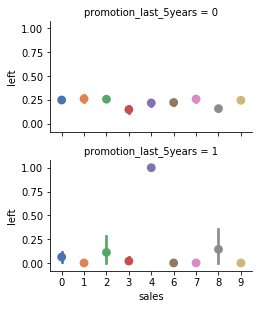

In [34]:
grid = sns.FacetGrid(train_df, row='promotion_last_5years', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'sales', 'left', palette='deep')
grid.add_legend()

In [35]:
grid = sns.FacetGrid(train_df, row='promotion_last_5years', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'salary', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


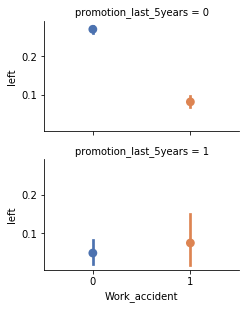

In [36]:
grid = sns.FacetGrid(train_df, row='promotion_last_5years', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Work_accident', 'left', palette='deep')
grid.add_legend()

In [37]:
grid = sns.FacetGrid(train_df, row='sales', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'promotion_last_5years', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


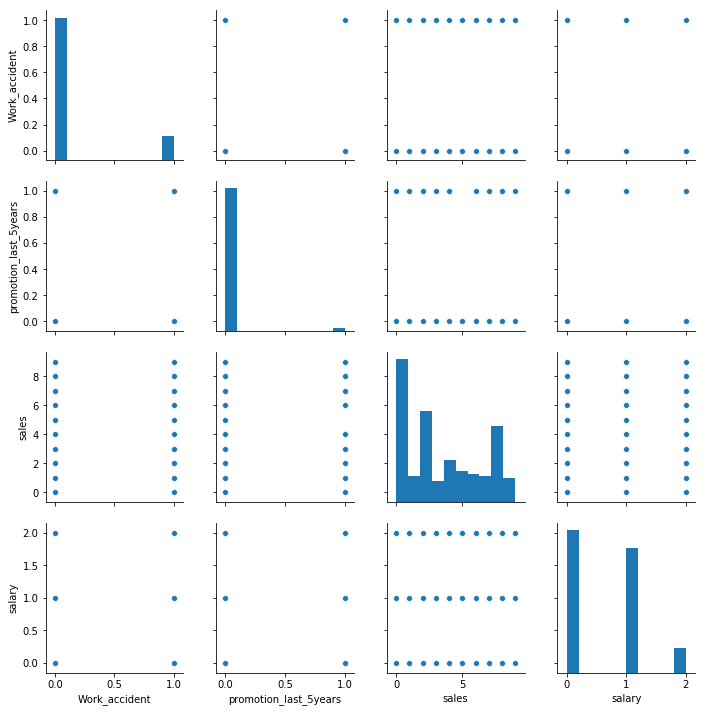

In [38]:
sns.pairplot(X_train)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


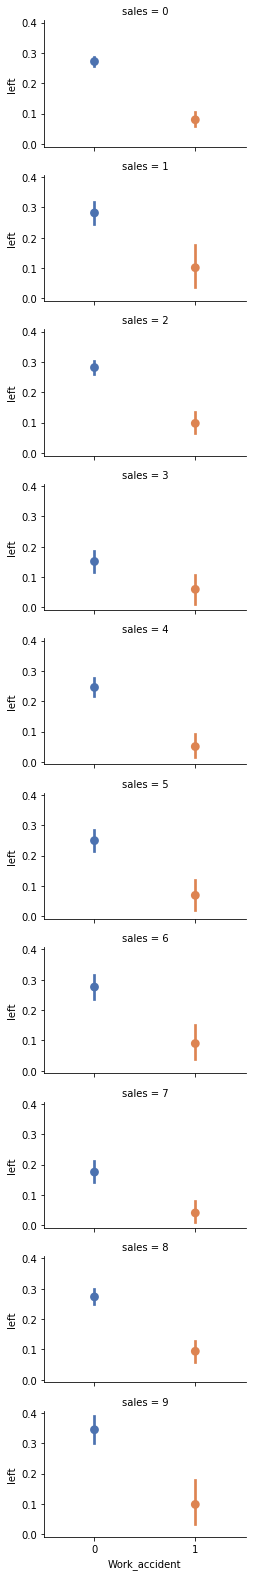

In [39]:
grid = sns.FacetGrid(train_df, row='sales', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Work_accident', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


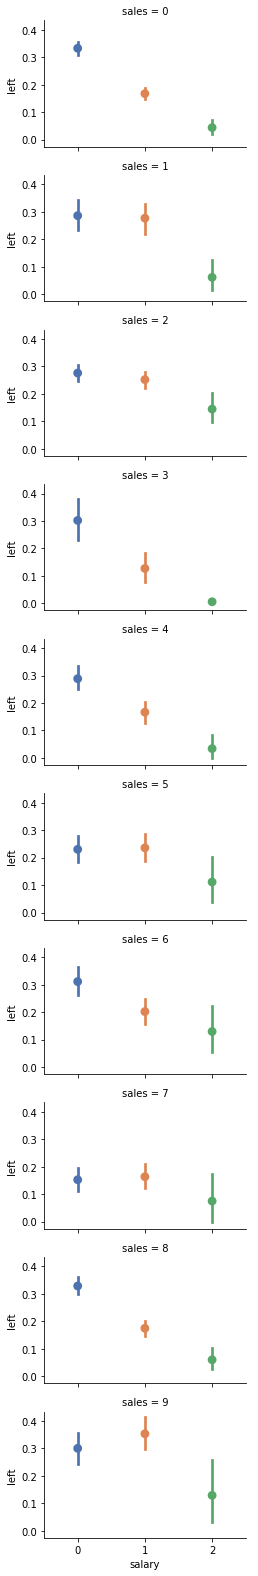

In [40]:
grid = sns.FacetGrid(train_df, row='sales', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'salary', 'left', palette='deep')
grid.add_legend()

In [41]:
grid = sns.FacetGrid(train_df, row='salary', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'promotion_last_5years', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [42]:
grid = sns.FacetGrid(train_df, row='salary', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Work_accident', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [43]:
grid = sns.FacetGrid(train_df, row='salary', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'sales', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [44]:
grid = sns.FacetGrid(train_df, row='Work_accident', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'sales', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [45]:
grid = sns.FacetGrid(train_df, row='Work_accident', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'salary', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


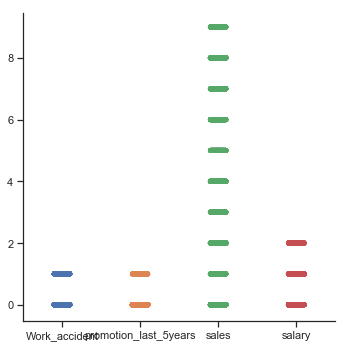

In [46]:
sns.set(style="ticks", color_codes=True)
sns.catplot(data=X_train);

In [47]:
grid = sns.FacetGrid(train_df, row='Work_accident', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'promotion_last_5years', 'left', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/neil/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [98]:
train_df

satisfaction_level  last_evaluation  number_project  \
0                    0.10             0.90               7   
1                    0.89             0.93               4   
2                    0.38             0.50               2   
3                    0.95             0.71               4   
4                    0.84             0.84               5   
5                    0.76             0.94               4   
6                    0.55             0.88               4   
7                    0.85             0.49               4   
8                    0.17             0.85               3   
9                    0.66             0.85               5   
10                   0.63             0.61               4   
11                   0.88             0.55               4   
12                   0.20             0.68               5   
13                   0.68             0.55               6   
14                   0.41             0.63               2   
15                   0.89             0.97               4   
16                   0.93             0.87               3   
17                   0.91             0.77               3   
18                   0.61             0.85               4   
19                   0.99             0.60               3   
20                   0.94             0.51               4   
21                   0.58             0.72               5   
22                   0.67             0.86               3   
23                   0.71             0.60               4   
24                   0.87             0.48               4   
25                   0.91             0.79               4   
26                   0.55             0.40               3   
27                   0.71             0.97               3   
28                   0.64             0.40               3   
29                   0.66             0.48               3   
...                   ...              ...             ...   
11208                0.88             0.77               4   
11209                0.87             0.57               4   
11210                0.10             0.86               6   
11211                0.75             0.78               4   
11212                0.99             0.66               3   
11213                0.12             0.49               4   
11214                0.59             0.99               3   
11215                0.11             0.92               6   
11216                0.89             0.95               4   
11217                0.78             1.00               5   
11218                0.70             0.85               4   
11219                0.76             0.93               4   
11220                0.14             0.38               5   
11221                0.66             0.96               3   
11222                0.29             0.75               6   
11223                0.98             0.62               3   
11224                0.10             0.97               7   
11225                0.78             0.58               3   
11226                0.40             0.46               2   
11227                0.73             0.62               5   
11228                0.84             1.00               5   
11229                0.40             0.51               2   
11230                0.68             0.68               3   
11231                0.73             0.68               3   
11232                0.71             0.99               3   
11233                0.72             0.51               3   
11234                0.18             0.70               5   
11235                0.51             0.72               3   
11236                0.69             0.99               3   
11237                0.42             0.53               3   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       286                   4              0     1   
1                 

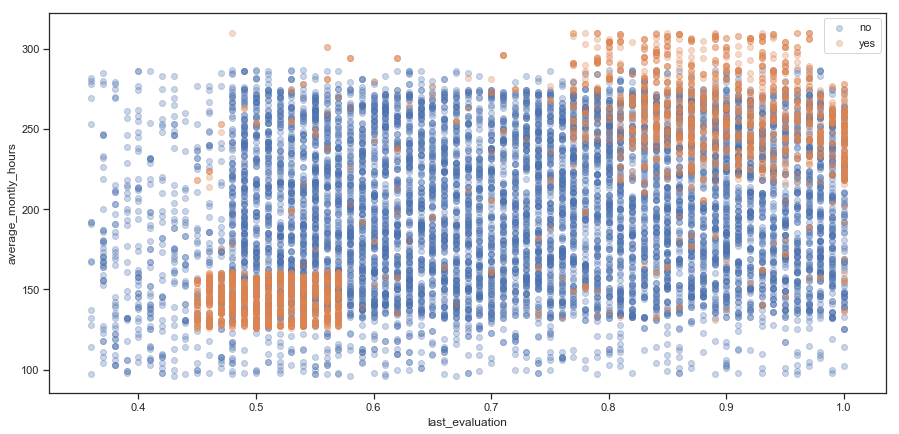

In [304]:
import matplotlib.pyplot as plt

plt1 = train_df[['last_evaluation','average_montly_hours','left']]
plt2 = plt1[plt1['left']==1]
plt3 = plt1[plt1['left']==0]

plt.scatter(plt3['last_evaluation'], plt3['average_montly_hours'], label="no", alpha=0.3)
plt.scatter(plt2['last_evaluation'], plt2['average_montly_hours'], label="yes", alpha = 0.3)
plt.xlabel('last_evaluation')
plt.ylabel('average_montly_hours')
plt.legend()

In [306]:
import matplotlib.pyplot as plt

plt1 = train_df[['last_evaluation','satisfaction_level','left']]
plt2 = plt1[plt1['left']==1]
plt3 = plt1[plt1['left']==0]

plt.scatter(plt3['last_evaluation'], plt3['satisfaction_level'], label="no", alpha=0.3)
plt.scatter(plt2['last_evaluation'], plt2['satisfaction_level'], label="yes", alpha = 0.3)
plt.xlabel('last_evaluation')
plt.ylabel('satisfaction_level')
plt.legend()

In [307]:
import matplotlib.pyplot as plt

plt1 = train_df[['sales','satisfaction_level','left']]
plt2 = plt1[plt1['left']==1]
plt3 = plt1[plt1['left']==0]

plt.scatter(plt3['sales'], plt3['satisfaction_level'], label="no", alpha=0.3)
plt.scatter(plt2['sales'], plt2['satisfaction_level'], label="yes", alpha = 0.3)
plt.xlabel('sales')
plt.ylabel('satisfaction_level')
plt.legend()

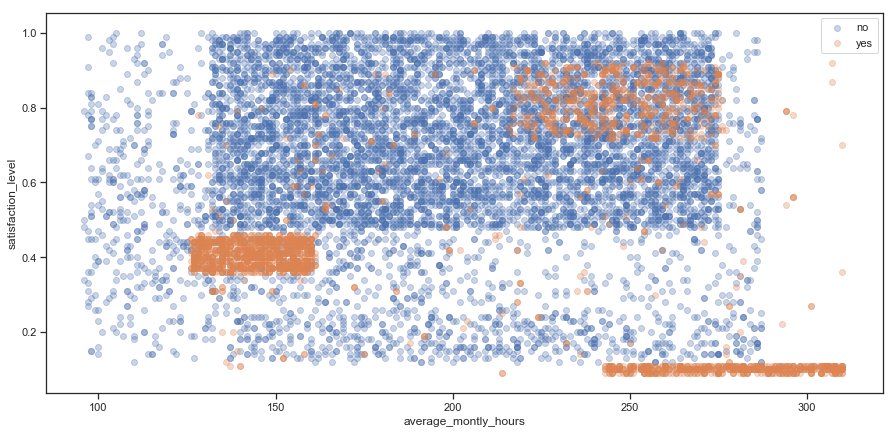

In [308]:
import matplotlib.pyplot as plt

plt1 = train_df[['average_montly_hours','satisfaction_level','left']]
plt2 = plt1[plt1['left']==1]
plt3 = plt1[plt1['left']==0]

plt.scatter(plt3['average_montly_hours'], plt3['satisfaction_level'], label="no", alpha=0.3)
plt.scatter(plt2['average_montly_hours'], plt2['satisfaction_level'], label="yes", alpha = 0.3)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.legend()

In [48]:
from collections import defaultdict, Counter
import numpy as np
import math
class DecisionTreeLeaf(object):
    def __init__(self,value):
        self.value = value
    def predict(self, x):
        return self.value
    def print_tree(self, indent):
        spaces = ' '*indent
        print('{0} ==> {1}'.format(spaces, self.value))

In [49]:
class DecisionTreeBranch(object):
    def __init__(self, feature_name, subtrees, default_value):
        self.feature_name = feature_name
        self.subtrees = subtrees
        self.default_value = default_value
        
    def predict(self, x):
        subtree = self.subtrees.get(x[self.feature_name])
        if subtree:
            return subtree.predict(x)
        else:
            return self.default_value
    def print_tree(self, indent):
        spaces = ' '*indent
        print('{0}{1}:'.format(spaces, self.feature_name))
        print('{0} <default> ==> {1}'.format(spaces, self.default_value))
        for v in sorted(self.subtrees):
            print('{0} {1} ->'.format(spaces,v))
            self.subtrees[v].print_tree(indent+4)

In [50]:
def train_decision_tree(XY, available_feature):
    distribution = Counter(y for _,y in XY)
    majority_value = distribution.most_common(1)[0][0]
    #print(distribution)
    if len(distribution) == 1:
        return DecisionTreeLeaf(majority_value)
    if not available_feature:
        return DecisionTreeLeaf(majority_value)
    selected_feature = min(available_feature, key=lambda f:majority_sum_scorer(f,XY))
    #print(selected_feature)
    next_available_feature = set(available_feature) - set([selected_feature])
    #print(next_available_feature)
    XY_split = split_by_feature(selected_feature, XY)
    subtrees = {}
    for value, XY_subset in XY_split.items():
        subtrees[value] = train_decision_tree(XY_subset, next_available_feature)
    return DecisionTreeBranch(selected_feature, subtrees, majority_value)

def split_by_feature(feature_name, XY):
    XY_split = defaultdict(list)
    for x, y in XY:
        #print(x)
        XY_split[x.get(feature_name)].append((x,y))
    return XY_split

def majority_sum_scorer(feature_name, XY):
    lst = list(set([x.get(feature_name) for x,y in XY]))
    #print(lst)
    q = [0]*len(lst)
    qpos = [0]*len(lst)
    for x,y in XY:
        for i in range(len(lst)):
            if x.get(feature_name) == lst[i]:
                q[i]+=1
                if y == 1:
                    qpos[i]+=1
    majority_sum = 0.0
    for i in range(len(q)):
        #majority_sum += 2*qpos[i]*(q[i]-qpos[i])
        #print('{0} {1}'.format(q[i],qpos[i]))
        if (q[i]>0 and qpos[i]>0) and qpos[i]<q[i]:
            x = -((qpos[i]/q[i])*np.log(qpos[i]/q[i]) + ((q[i]-qpos[i])/q[i])*np.log((q[i]-qpos[i])/q[i]))
            majority_sum += (q[i]/len(XY)) *x 
    #print('{0} {1}'.format(majority_sum, feature_name))
    return majority_sum

In [51]:
class DecisionTree(object):
    def __init__(self):
        pass
    def fit(self, X, Y):
        #XY = list(zip(train_df['sales'],train_df['salary'],train_df['promotion_last_5years'],train_df['Work_accident'],Y))
        XY = list(zip(X, Y))
        #print(XY)
        #print(Y)
        available_features = set(f for x in X for f in x)
        #print(available_features)
        self.root = train_decision_tree(XY, available_features)
    def predict(self, X):
        return [self.predict_one(x) for x in X]
    
    def predict_one(self, x):
        return self.root.predict(x)
    def print_tree(self):
        return self.root.print_tree(0)

In [52]:
X = [{'city':'Gothenburg', 'month':'July'},
     {'city':'Gothenburg', 'month':'December'},
     {'city':'Paris', 'month':'July'},
     {'city':'Paris', 'month':'December'},
     {'city':'Delhi', 'month':'Jan'},
     {'city':'kolkata', 'month':'Jan'}
    ]

# training set: the gold-standard outputs
Y = ['rain', 'rain', 'sun', 'rain', 'sun', 'rain']


In [53]:
print(X_train)

       Work_accident  promotion_last_5years  sales  salary
0                  0                      0      0       0
1                  0                      0      0       0
2                  0                      0      1       0
3                  0                      0      0       1
4                  0                      0      2       0
5                  0                      0      2       1
6                  0                      0      3       0
7                  0                      0      0       1
8                  0                      0      4       0
9                  0                      0      5       0
10                 0                      0      0       0
11                 0                      0      5       0
12                 0                      0      6       1
13                 0                      0      4       1
14                 0                      0      5       0
15                 0                      0      2      

In [54]:
X_train1 = X_train.to_dict('records')

In [55]:
print(X_train1)

[{'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 0, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 0, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 1, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 0, 'salary': 1}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 2, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 2, 'salary': 1}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 3, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 0, 'salary': 1}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 4, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 5, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 0, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 5, 'salary': 0}, {'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 6, 'salary': 1}, {'Work_accident': 0, 'pr

In [56]:
classifier = DecisionTree()
classifier.fit(X_train1, Y_train)

In [57]:
classifier.predict([{'Work_accident': 0, 'promotion_last_5years': 0, 'sales': 4, 'salary': 0}])

[0]

In [58]:
classifier.print_tree()

salary:
 <default> ==> 0
 0 ->
    Work_accident:
     <default> ==> 0
     0 ->
        sales:
         <default> ==> 0
         0 ->
            promotion_last_5years:
             <default> ==> 0
             0 ->
                 ==> 0
             1 ->
                 ==> 0
         1 ->
            promotion_last_5years:
             <default> ==> 0
             0 ->
                 ==> 0
             1 ->
                 ==> 0
         2 ->
            promotion_last_5years:
             <default> ==> 0
             0 ->
                 ==> 0
             1 ->
                 ==> 0
         3 ->
            promotion_last_5years:
             <default> ==> 0
             0 ->
                 ==> 0
             1 ->
                 ==> 1
         4 ->
            promotion_last_5years:
             <default> ==> 0
             0 ->
                 ==> 0
             1 ->
                 ==> 1
         5 ->
            promotion_last_5years:
             <default> ==> 0
 

In [59]:
from sklearn.metrics import accuracy_score
guesses = classifier.predict(X_train1)

#print(guesses)
g = clf.predict(X_train)
accuracy_score(Y_train,g)
#accuracy_score(Y_train, guesses)

0.7624132407901761

In [60]:
from random import seed
from random import randrange

def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(groups))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val)/size
            score += p*p
        gini += (1.0 - score)*(size/n_instance)
    return gini
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index]<value:
            left.append(row)
        else:
            right.append(row)
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999,999,999, None
    for index in range(len(dataset[0])-1):
        groups = test_split(index, row[index], dataset)
        gini = gini_index(groups, class_values)
        if gini < b_score:
            b_index, b_value, b_score, b_groups = index, row_index, gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key = outcomes.count)

def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left+right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)
        
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    prediction = list()
    #for row in test:
    #    prediction = predict(tree, row)
    #    prediction.append(prediction)
    return prediction
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else: print('%s[%s]' % ((depth*' ', node)))

In [61]:
from scipy.stats.mstats import mquantiles
def train_decision_tree_num(XY, available_feature, max_depth):
    distribution = Counter(y for _,y in XY)
    majority_value = distribution.most_common(1)[0][0]
    #print(distribution)
    if max_depth == 0:
        return DecisionTreeLeaf(majority_value)
    if len(distribution) == 1:
        return DecisionTreeLeaf(majority_value)
    if not available_feature:
        return DecisionTreeLeaf(majority_value)
    selected_feature = min(available_feature, key=lambda f:majority_sum_scorer(f,XY))
    _,split_pos = majority_sum_scorer(selected_feature,XY)
    print(selected_feature)
    print(split_pos)
    next_available_feature = set(available_feature) # - set([selected_feature])
    #print(next_available_feature)
    XY_split = split_by_feature(selected_feature, XY,split_pos)
    subtrees = {}
    for value, XY_subset in XY_split.items():
        subtrees[value] = train_decision_tree_num(XY_subset, next_available_feature, max_depth-1)
    return DecisionTreeBranchNum(selected_feature, subtrees, majority_value, split_pos)

def split_by_feature(feature_name, XY,split_pos):
    XY_split = defaultdict(list)
    for x, y in XY:
        #print(x)
        if x.get(feature_name) < split_pos:
            XY_split[0].append((x,y))
        else:
            XY_split[1].append((x,y))
    return XY_split

def majority_sum_scorer_cat(feature_name, XY):
    lst = list(set([x.get(feature_name) for x,y in XY]))
    #print(lst)
    q = [0]*len(lst)
    qpos = [0]*len(lst)
    for x,y in XY:
        for i in range(len(lst)):
            if x.get(feature_name) == lst[i]:
                q[i]+=1
                if y == 1:
                    qpos[i]+=1
    majority_sum = 0.0
    for i in range(len(q)):
        #majority_sum += 2*qpos[i]*(q[i]-qpos[i])
        #print('{0} {1}'.format(q[i],qpos[i]))
        if (q[i]>0 and qpos[i]>0) and qpos[i]<q[i]:
            x = -((qpos[i]/q[i])*np.log(qpos[i]/q[i]) + ((q[i]-qpos[i])/q[i])*np.log((q[i]-qpos[i])/q[i]))
            majority_sum += (q[i]/len(XY)) *x 
    #print('{0} {1}'.format(majority_sum, feature_name))
    return majority_sum

def majority_sum_scorer(feature_name, XY):
    lst = sorted(list(set([x.get(feature_name) for x,y in XY])))
    #print(mquantiles(lst))
    #print(feature_name)
    #print(lst)
    split_pos = lst[0]
    mx = 1e19
    for k in range(len(lst)):
        q = [0]*2
        qpos = [0]*2
        for x,y in XY:
            if x.get(feature_name) < lst[k]:
                q[0]+=1
                if y == 1:
                    qpos[0]+=1
            else:
                q[1]+=1
                if y==1:
                    qpos[1] += 1
                        
        majority_sum = 0.0
        for i in range(len(q)):
            #majority_sum += 2*qpos[i]*(q[i]-qpos[i])
            #print('{0} {1}'.format(q[i],qpos[i]))
            if (q[i]>0 and qpos[i]>0) and qpos[i]<q[i]:
                y = -((qpos[i]/q[i])*np.log(qpos[i]/q[i]) + ((q[i]-qpos[i])/q[i])*np.log((q[i]-qpos[i])/q[i]))
                majority_sum += (q[i]/len(XY)) *y 
        if mx>=majority_sum:
            mx = majority_sum
            split_pos = lst[k]
    #print('{0} {1} {2}'.format(feature_name, majority_sum, lst[k]))
    return (mx,split_pos)

In [62]:
class DecisionTreeBranchNum(object):
    def __init__(self, feature_name, subtrees, default_value, split_pos):
        self.feature_name = feature_name
        self.subtrees = subtrees
        self.default_value = default_value
        self.split_pos = split_pos
        
    def predict(self, x):
        subtree = None
        if x[self.feature_name]<self.split_pos:
            subtree = self.subtrees.get(0)
        else:
            subtree = self.subtrees.get(1)
        print(x[self.feature_name])
        if subtree:
            return subtree.predict(x)
        else:
            return self.default_value
    def print_tree(self, indent):
        spaces = ' '*indent
        print('{0}{1}:'.format(spaces, self.feature_name))
        print('{0} <default> ==> {1}'.format(spaces, self.default_value))
        for v in sorted(self.subtrees):
            print('{0} {1} ->'.format(spaces,v))
            self.subtrees[v].print_tree(indent+4)

In [63]:
class DecisionTreeNum(object):
    def __init__(self):
        pass
    def fit(self, X, Y, max_depth):
        #XY = list(zip(train_df['sales'],train_df['salary'],train_df['promotion_last_5years'],train_df['Work_accident'],Y))
        XY = list(zip(X, Y))
        #print(XY)
        #print(Y)
        available_features = set(f for x in X for f in x)
        #print(available_features)
        self.root = train_decision_tree_num(XY, available_features, max_depth)
    def predict(self, X):
        return [self.predict_one(x) for x in X]
    
    def predict_one(self, x):
        return self.root.predict(x)
    def print_tree(self):
        return self.root.print_tree(0)

In [64]:
X_train_num = train_df.drop(['Work_accident', 'promotion_last_5years', 'sales','salary','left'], axis=1)

In [65]:
X_train_num

satisfaction_level  last_evaluation  number_project  \
0                    0.10             0.90               7   
1                    0.89             0.93               4   
2                    0.38             0.50               2   
3                    0.95             0.71               4   
4                    0.84             0.84               5   
5                    0.76             0.94               4   
6                    0.55             0.88               4   
7                    0.85             0.49               4   
8                    0.17             0.85               3   
9                    0.66             0.85               5   
10                   0.63             0.61               4   
11                   0.88             0.55               4   
12                   0.20             0.68               5   
13                   0.68             0.55               6   
14                   0.41             0.63               2   
15                   0.89             0.97               4   
16                   0.93             0.87               3   
17                   0.91             0.77               3   
18                   0.61             0.85               4   
19                   0.99             0.60               3   
20                   0.94             0.51               4   
21                   0.58             0.72               5   
22                   0.67             0.86               3   
23                   0.71             0.60               4   
24                   0.87             0.48               4   
25                   0.91             0.79               4   
26                   0.55             0.40               3   
27                   0.71             0.97               3   
28                   0.64             0.40               3   
29                   0.66             0.48               3   
...                   ...              ...             ...   
11208                0.88             0.77               4   
11209                0.87             0.57               4   
11210                0.10             0.86               6   
11211                0.75             0.78               4   
11212                0.99             0.66               3   
11213                0.12             0.49               4   
11214                0.59             0.99               3   
11215                0.11             0.92               6   
11216                0.89             0.95               4   
11217                0.78             1.00               5   
11218                0.70             0.85               4   
11219                0.76             0.93               4   
11220                0.14             0.38               5   
11221                0.66             0.96               3   
11222                0.29             0.75               6   
11223                0.98             0.62               3   
11224                0.10             0.97               7   
11225                0.78             0.58               3   
11226                0.40             0.46               2   
11227                0.73             0.62               5   
11228                0.84             1.00               5   
11229                0.40             0.51               2   
11230                0.68             0.68               3   
11231                0.73             0.68               3   
11232                0.71             0.99               3   
11233                0.72             0.51               3   
11234                0.18             0.70               5   
11235                0.51             0.72               3   
11236                0.69             0.99               3   
11237                0.42             0.53               3   

       average_montly_hours  time_spend_company  
0                       286                   4  
1                       249                   3  
2           

In [66]:
X_train1_num = X_train_num.to_dict('records')

In [67]:
classifier = DecisionTreeNum()
classifier.fit(X_train1_num, Y_train,10)

satisfaction_level
0.47
satisfaction_level
0.12
number_project
3.0
last_evaluation
0.58
last_evaluation
0.45
average_montly_hours
163.0
average_montly_hours
126.0
satisfaction_level
0.32
satisfaction_level
0.43
average_montly_hours
154.0
average_montly_hours
248.0
satisfaction_level
0.43
average_montly_hours
280.0
last_evaluation
0.78
last_evaluation
0.79
satisfaction_level
0.46
last_evaluation
0.86
satisfaction_level
0.43
number_project
7.0
average_montly_hours
293.0
average_montly_hours
132.0
satisfaction_level
0.31
satisfaction_level
0.15
average_montly_hours
140.0
average_montly_hours
188.0
satisfaction_level
0.21
time_spend_company
3.0
average_montly_hours
277.0
last_evaluation
0.95
last_evaluation
0.53
satisfaction_level
0.34
last_evaluation
0.97
number_project
4.0
time_spend_company
5.0
average_montly_hours
294.0
number_project
6.0
time_spend_company
4.0
number_project
3.0
satisfaction_level
0.91
satisfaction_level
0.59
satisfaction_level
0.78
satisfaction_level
0.81
last_evalua

In [68]:
classifier.print_tree()

satisfaction_level:
 <default> ==> 0
 0 ->
    satisfaction_level:
     <default> ==> 1
     0 ->
         ==> 1
     1 ->
        number_project:
         <default> ==> 0
         0 ->
            last_evaluation:
             <default> ==> 1
             0 ->
                last_evaluation:
                 <default> ==> 1
                 0 ->
                     ==> 0
                 1 ->
                    average_montly_hours:
                     <default> ==> 1
                     0 ->
                        average_montly_hours:
                         <default> ==> 1
                         0 ->
                             ==> 0
                         1 ->
                            satisfaction_level:
                             <default> ==> 1
                             0 ->
                                 ==> 0
                             1 ->
                                satisfaction_level:
                                 <default> ==> 1
             

In [69]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_num, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
from sklearn.metrics import accuracy_score
guesses = classifier.predict(X_train1_num)

#print(guesses)
#g = clf.predict(X_train_num)
#accuracy_score(Y_train,g)
accuracy_score(Y_train, guesses)

0.1
0.1
0.89
3.0
249.0
4.0
3.0
4.0
0.89
0.89
0.89
0.89
0.38
0.38
2.0
0.5
0.5
132.0
132.0
0.38
0.38
132.0
0.95
4.0
151.0
4.0
4.0
0.95
0.84
3.0
163.0
5.0
3.0
5.0
0.84
0.84
0.84
0.84
0.76
6.0
0.94
168.0
6.0
0.94
4.0
0.55
3.0
252.0
4.0
3.0
4.0
0.55
0.55
4.0
0.88
0.85
2.0
139.0
4.0
2.0
4.0
0.85
0.85
0.85
0.85
0.17
0.17
3.0
3.0
168.0
168.0
0.17
0.17
168.0
168.0
0.66
4.0
271.0
5.0
4.0
0.66
0.66
271.0
271.0
0.85
0.63
3.0
171.0
4.0
3.0
4.0
0.63
0.63
0.63
0.61
0.88
4.0
205.0
4.0
4.0
0.88
0.88
205.0
205.0
0.55
0.2
0.2
5.0
5.0
167.0
167.0
0.2
0.2
167.0
167.0
0.68
3.0
181.0
6.0
6.0
0.55
0.41
0.41
2.0
0.63
145.0
0.63
0.89
2.0
147.0
4.0
2.0
4.0
0.89
0.89
0.89
0.89
0.93
3.0
154.0
3.0
3.0
3.0
0.93
0.91
7.0
0.77
7.0
0.61
3.0
273.0
4.0
3.0
4.0
0.61
0.61
0.61
0.85
0.99
2.0
262.0
3.0
2.0
3.0
0.99
0.94
2.0
229.0
4.0
2.0
4.0
0.94
0.58
3.0
234.0
5.0
3.0
5.0
0.58
0.58
5.0
0.72
0.67
3.0
175.0
3.0
3.0
3.0
0.67
0.67
0.67
0.86
0.71
3.0
208.0
4.0
3.0
4.0
0.71
0.71
0.71
0.6
0.87
2.0
133.0
4.0
2.0
4.0
0.87
0.87
0.87


128.0
0.4
0.4
128.0
0.59
3.0
211.0
5.0
3.0
5.0
0.59
0.59
0.59
0.96
0.57
3.0
162.0
4.0
3.0
4.0
0.57
0.57
4.0
0.65
0.47
4.0
254.0
4.0
4.0
0.47
0.47
0.5
0.41
0.41
2.0
0.48
0.48
141.0
141.0
0.41
0.41
141.0
0.1
0.1
0.83
3.0
171.0
5.0
3.0
5.0
0.83
0.83
0.83
0.83
0.65
2.0
211.0
4.0
2.0
4.0
0.65
0.65
0.65
0.7
0.59
2.0
250.0
4.0
2.0
4.0
0.59
0.59
0.59
0.56
0.73
3.0
267.0
4.0
3.0
4.0
0.73
0.73
0.73
0.55
0.56
3.0
176.0
3.0
3.0
3.0
0.56
0.56
3.0
0.56
0.49
2.0
161.0
4.0
2.0
4.0
0.49
0.49
4.0
0.8
0.7
3.0
145.0
6.0
6.0
0.79
0.7
0.79
145.0
145.0
0.54
2.0
154.0
3.0
2.0
3.0
0.54
0.54
3.0
0.54
0.88
6.0
1.0
226.0
6.0
0.88
5.0
5.0
0.88
226.0
0.82
5.0
0.84
244.0
5.0
0.82
5.0
5.0
0.82
244.0
0.98
3.0
207.0
4.0
3.0
4.0
0.98
0.52
2.0
183.0
3.0
2.0
3.0
0.52
0.52
3.0
0.52
0.9
3.0
135.0
3.0
3.0
3.0
0.9
0.9
0.9
0.9
0.45
0.45
2.0
0.57
0.57
136.0
136.0
0.45
0.45
0.5
3.0
270.0
3.0
3.0
3.0
0.5
0.5
3.0
0.5
0.57
3.0
192.0
3.0
3.0
3.0
0.57
0.57
3.0
0.57
0.36
0.36
2.0
0.54
0.54
158.0
158.0
0.36
0.36
158.0
0.89
2.0
235.0
4.

0.74
0.51
0.6
4.0
219.0
4.0
4.0
0.6
0.6
219.0
219.0
0.48
0.66
2.0
168.0
4.0
2.0
4.0
0.66
0.66
0.66
0.84
0.89
3.0
186.0
3.0
3.0
3.0
0.89
0.89
0.89
0.89
0.85
4.0
155.0
4.0
4.0
0.85
0.85
155.0
155.0
0.85
0.74
3.0
166.0
3.0
3.0
3.0
0.74
0.74
0.74
0.98
0.39
0.39
2.0
0.55
0.55
156.0
156.0
0.39
0.39
156.0
0.39
0.39
2.0
0.54
0.54
127.0
127.0
0.39
0.39
127.0
0.43
0.43
2.0
0.53
0.53
146.0
146.0
0.43
0.43
0.72
2.0
198.0
3.0
2.0
3.0
0.72
0.72
0.72
0.58
0.61
3.0
271.0
3.0
3.0
3.0
0.61
0.61
0.61
0.82
0.82
3.0
148.0
3.0
3.0
3.0
0.82
0.82
0.82
0.82
0.4
0.4
2.0
0.54
0.54
139.0
139.0
0.4
0.4
139.0
0.75
4.0
133.0
4.0
4.0
0.75
0.75
133.0
0.83
0.31
0.31
2.0
0.72
191.0
0.72
0.78
3.0
206.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.65
2.0
186.0
4.0
2.0
4.0
0.65
0.65
0.65
0.71
0.4
0.4
2.0
0.46
0.46
155.0
155.0
0.4
0.4
155.0
0.25
0.25
6.0
6.0
217.0
217.0
0.25
0.25
217.0
217.0
0.84
3.0
266.0
3.0
3.0
3.0
0.84
0.84
0.84
0.84
0.1
0.1
0.62
2.0
173.0
4.0
2.0
4.0
0.62
0.62
0.62
0.74
0.75
6.0
0.97
243.0
6.0
0.75
5.0
5.0
0.75
2

0.17
0.17
267.0
267.0
0.37
0.37
2.0
0.41
0.41
0.81
5.0
1.0
235.0
5.0
0.81
5.0
5.0
0.81
235.0
0.1
0.1
0.09
0.09
0.4
0.4
5.0
5.0
181.0
181.0
0.4
0.79
0.4
0.79
0.73
3.0
222.0
4.0
3.0
4.0
0.73
0.73
0.73
0.6
0.65
2.0
145.0
4.0
2.0
4.0
0.65
0.65
0.65
0.97
0.11
0.11
0.73
5.0
0.91
247.0
5.0
0.73
4.0
4.0
0.73
247.0
0.1
0.1
0.92
3.0
212.0
4.0
3.0
4.0
0.92
0.73
3.0
174.0
3.0
3.0
3.0
0.73
0.73
0.73
0.97
0.91
3.0
159.0
4.0
3.0
4.0
0.91
0.62
3.0
134.0
5.0
3.0
5.0
0.62
0.62
0.62
0.51
0.09
0.09
0.34
0.34
4.0
4.0
284.0
284.0
0.34
0.91
0.34
0.91
0.52
3.0
176.0
5.0
3.0
5.0
0.52
0.52
5.0
0.9
0.38
0.38
5.0
5.0
145.0
145.0
0.38
0.6
0.38
0.6
0.54
4.0
98.0
2.0
4.0
0.54
0.54
98.0
0.46
0.46
0.46
2.0
0.52
0.52
131.0
131.0
0.46
0.46
0.52
3.0
170.0
4.0
3.0
4.0
0.52
0.52
4.0
0.97
0.56
2.0
191.0
4.0
2.0
4.0
0.56
0.56
4.0
0.54
0.5
3.0
134.0
5.0
3.0
5.0
0.5
0.5
5.0
0.51
0.92
2.0
252.0
2.0
2.0
2.0
252.0
0.92
0.92
0.92
0.62
3.0
172.0
3.0
3.0
3.0
0.62
0.62
0.62
0.49
0.58
4.0
205.0
4.0
4.0
0.58
0.58
205.0
205.0
0.73
0.67


0.62
4.0
252.0
4.0
4.0
0.62
0.62
252.0
252.0
0.94
0.87
3.0
176.0
3.0
3.0
3.0
0.87
0.87
0.87
0.87
0.1
0.1
0.99
2.0
257.0
3.0
2.0
3.0
0.99
0.59
2.0
219.0
2.0
2.0
2.0
219.0
0.59
0.59
0.94
2.0
151.0
3.0
2.0
3.0
0.94
0.37
0.37
2.0
0.52
0.52
155.0
155.0
0.37
0.37
155.0
0.57
4.0
172.0
5.0
4.0
0.57
0.57
172.0
172.0
0.75
0.77
3.0
238.0
5.0
3.0
5.0
0.77
0.77
0.77
0.86
0.77
2.0
149.0
5.0
2.0
5.0
0.77
0.77
0.77
0.76
0.37
0.37
2.0
0.54
0.54
152.0
152.0
0.37
0.37
152.0
0.44
0.44
2.0
0.52
0.52
137.0
137.0
0.44
0.44
0.33
0.33
6.0
6.0
239.0
239.0
0.33
0.45
0.76
3.0
229.0
2.0
3.0
2.0
229.0
0.76
0.76
0.76
0.92
6.0
0.85
151.0
6.0
0.85
3.0
0.71
3.0
177.0
4.0
3.0
4.0
0.71
0.71
0.71
0.72
0.99
2.0
172.0
4.0
2.0
4.0
0.99
0.44
0.44
2.0
0.51
0.51
150.0
150.0
0.44
0.44
0.78
3.0
139.0
3.0
3.0
3.0
0.78
0.78
0.78
0.78
0.45
0.45
2.0
0.52
0.52
145.0
145.0
0.45
0.45
0.83
2.0
257.0
3.0
2.0
3.0
0.83
0.83
0.83
0.83
0.46
0.46
2.0
0.53
0.53
129.0
129.0
0.46
0.46
0.56
3.0
173.0
3.0
3.0
3.0
0.56
0.56
3.0
0.56
0.8
3.0
187.0
5.

0.61
0.61
0.61
0.95
0.67
2.0
107.0
6.0
6.0
0.48
0.92
3.0
149.0
3.0
3.0
3.0
0.92
0.53
5.0
0.95
101.0
5.0
2.0
101.0
0.6
7.0
0.53
7.0
0.92
6.0
0.87
226.0
6.0
0.92
4.0
4.0
0.92
226.0
0.4
0.4
2.0
0.56
0.56
148.0
148.0
0.4
0.4
148.0
0.6
3.0
202.0
3.0
3.0
3.0
0.6
0.6
0.6
0.77
0.37
0.37
2.0
0.46
0.46
158.0
158.0
0.37
0.37
158.0
0.81
2.0
271.0
4.0
2.0
4.0
0.81
0.81
0.81
0.81
0.84
4.0
199.0
3.0
4.0
0.84
0.84
199.0
199.0
0.91
0.81
5.0
1.0
241.0
5.0
0.81
4.0
4.0
0.81
241.0
0.69
4.0
198.0
3.0
4.0
0.69
0.69
198.0
198.0
0.49
0.24
0.24
6.0
6.0
225.0
225.0
0.24
0.24
225.0
225.0
0.41
0.41
2.0
0.52
0.52
159.0
159.0
0.41
0.41
159.0
0.97
3.0
180.0
3.0
3.0
3.0
0.97
0.54
3.0
234.0
3.0
3.0
3.0
0.54
0.54
3.0
0.54
0.91
2.0
210.0
3.0
2.0
3.0
0.91
0.3
0.3
2.0
0.47
0.47
159.0
159.0
0.3
0.38
0.38
2.0
0.49
0.49
135.0
135.0
0.38
0.38
135.0
0.51
7.0
0.89
233.0
7.0
0.72
3.0
144.0
4.0
3.0
4.0
0.72
0.72
0.72
0.76
0.65
3.0
223.0
5.0
3.0
5.0
0.65
0.65
0.65
0.89
1.0
3.0
223.0
3.0
3.0
3.0
1.0
0.76
3.0
137.0
4.0
3.0
4.0
0.76


0.51
0.51
136.0
136.0
0.42
0.42
136.0
0.59
3.0
200.0
3.0
3.0
3.0
0.59
0.59
0.59
0.69
0.9
3.0
163.0
5.0
3.0
5.0
0.9
0.9
0.9
0.9
0.97
2.0
169.0
3.0
2.0
3.0
0.97
0.8
3.0
209.0
3.0
3.0
3.0
0.8
0.8
0.8
0.8
0.42
0.42
2.0
0.56
0.56
156.0
156.0
0.42
0.42
156.0
0.74
5.0
1.0
248.0
5.0
0.74
5.0
5.0
0.74
248.0
0.42
0.42
6.0
6.0
218.0
218.0
0.42
0.74
0.42
0.74
0.2
0.2
5.0
5.0
272.0
272.0
0.2
0.2
272.0
272.0
0.36
0.36
2.0
0.56
0.56
137.0
137.0
0.36
0.36
137.0
0.95
4.0
210.0
5.0
4.0
0.95
0.09
0.09
0.74
5.0
0.84
249.0
5.0
0.74
5.0
5.0
0.74
249.0
0.52
5.0
0.47
5.0
108.0
0.47
0.61
3.0
224.0
3.0
3.0
3.0
0.61
0.61
0.61
0.9
0.85
3.0
182.0
5.0
3.0
5.0
0.85
0.85
0.85
0.85
0.99
2.0
270.0
4.0
2.0
4.0
0.99
0.76
2.0
229.0
5.0
2.0
5.0
0.76
0.76
0.76
0.8
0.46
0.46
2.0
0.46
0.46
154.0
154.0
0.46
0.46
0.88
5.0
0.97
255.0
5.0
0.88
4.0
4.0
0.88
255.0
0.79
4.0
154.0
3.0
4.0
0.79
0.79
154.0
154.0
0.79
0.1
0.1
0.76
3.0
258.0
4.0
3.0
4.0
0.76
0.76
0.76
0.98
1.0
3.0
150.0
3.0
3.0
3.0
1.0
0.6
10.0
0.65
10.0
0.81
3.0
133.0
3

248.0
0.81
2.0
212.0
4.0
2.0
4.0
0.81
0.81
0.81
0.81
0.51
2.0
267.0
3.0
2.0
3.0
0.51
0.51
3.0
0.51
0.92
3.0
190.0
3.0
3.0
3.0
0.92
0.72
4.0
178.0
2.0
4.0
0.72
0.72
178.0
178.0
0.95
0.6
4.0
265.0
4.0
4.0
0.6
0.6
265.0
265.0
0.7
0.19
0.19
3.0
3.0
225.0
225.0
0.19
0.19
225.0
225.0
0.72
3.0
134.0
3.0
3.0
3.0
0.72
0.72
0.72
0.66
0.91
4.0
133.0
4.0
4.0
0.91
0.59
4.0
203.0
3.0
4.0
0.59
0.59
203.0
203.0
0.62
0.81
5.0
1.0
253.0
5.0
0.81
4.0
4.0
0.81
253.0
0.37
0.37
2.0
0.55
0.55
152.0
152.0
0.37
0.37
152.0
0.88
3.0
265.0
3.0
3.0
3.0
0.88
0.88
0.88
0.88
0.6
7.0
0.53
7.0
0.92
2.0
139.0
3.0
2.0
3.0
0.92
0.77
2.0
257.0
5.0
2.0
5.0
0.77
0.77
0.77
0.87
0.41
0.41
2.0
0.54
0.54
152.0
152.0
0.41
0.41
152.0
0.48
6.0
0.93
219.0
6.0
0.48
0.93
0.48
3.0
0.48
0.78
3.0
264.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.44
0.44
2.0
0.45
0.45
156.0
156.0
0.44
0.44
0.11
0.11
0.1
0.1
0.75
4.0
186.0
5.0
4.0
0.75
0.75
186.0
186.0
0.9
0.6
4.0
272.0
6.0
6.0
0.86
0.6
0.86
272.0
0.49
4.0
134.0
4.0
4.0
0.49
0.49
134.0
0.91
0.91
0.6

2.0
0.48
0.48
153.0
153.0
0.37
0.37
153.0
0.22
0.22
4.0
4.0
106.0
106.0
0.97
2.0
199.0
5.0
2.0
5.0
0.97
0.86
2.0
243.0
4.0
2.0
4.0
0.86
0.86
0.86
0.86
0.57
4.0
241.0
3.0
4.0
0.57
0.57
241.0
241.0
1.0
0.1
0.1
0.54
3.0
211.0
3.0
3.0
3.0
0.54
0.54
3.0
0.54
0.48
3.0
268.0
3.0
3.0
3.0
0.48
0.48
3.0
0.48
0.51
3.0
180.0
2.0
3.0
2.0
180.0
0.51
0.51
0.55
3.0
192.0
3.0
3.0
3.0
0.55
0.55
3.0
0.55
0.69
3.0
170.0
3.0
3.0
3.0
0.69
0.69
0.69
0.94
0.79
3.0
171.0
4.0
3.0
4.0
0.79
0.79
0.79
0.79
0.98
3.0
203.0
3.0
3.0
3.0
0.98
0.59
3.0
126.0
2.0
3.0
2.0
126.0
0.11
0.11
0.65
2.0
226.0
5.0
2.0
5.0
0.65
0.65
0.65
0.96
0.31
0.31
4.0
4.0
149.0
149.0
0.31
0.77
0.31
4.0
0.72
2.0
187.0
3.0
2.0
3.0
0.72
0.72
0.72
0.74
0.4
0.4
2.0
0.47
0.47
152.0
152.0
0.4
0.4
152.0
0.21
0.21
4.0
4.0
270.0
270.0
0.21
0.21
270.0
270.0
0.87
2.0
139.0
3.0
2.0
3.0
0.87
0.87
0.87
0.87
0.61
3.0
114.0
3.0
3.0
3.0
0.61
0.61
0.61
0.45
0.88
5.0
1.0
259.0
5.0
0.88
4.0
4.0
0.88
259.0
0.9
6.0
1.0
221.0
6.0
0.9
5.0
5.0
0.9
221.0
0.55
6.0
0.48


0.94
4.0
257.0
3.0
4.0
0.94
0.45
0.45
2.0
0.55
0.55
140.0
140.0
0.45
0.45
0.41
0.41
2.0
0.54
0.54
145.0
145.0
0.41
0.41
145.0
0.41
0.41
6.0
6.0
262.0
262.0
0.41
0.87
0.41
0.87
0.72
3.0
250.0
4.0
3.0
4.0
0.72
0.72
0.72
0.84
0.74
2.0
221.0
3.0
2.0
3.0
0.74
0.74
0.74
0.86
0.56
2.0
141.0
3.0
2.0
3.0
0.56
0.56
3.0
0.56
1.0
3.0
270.0
6.0
6.0
0.61
0.51
3.0
260.0
4.0
3.0
4.0
0.51
0.51
4.0
0.86
0.89
3.0
190.0
4.0
3.0
4.0
0.89
0.89
0.89
0.89
0.1
0.1
0.76
2.0
138.0
3.0
2.0
3.0
0.76
0.76
0.76
0.49
0.78
7.0
0.8
7.0
0.73
3.0
155.0
4.0
3.0
4.0
0.73
0.73
0.73
0.87
0.73
3.0
141.0
4.0
3.0
4.0
0.73
0.73
0.73
0.52
0.92
10.0
0.64
10.0
0.86
2.0
274.0
4.0
2.0
4.0
0.86
0.86
0.86
0.86
0.49
2.0
221.0
3.0
2.0
3.0
0.49
0.49
3.0
0.49
0.78
3.0
143.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.48
6.0
0.98
259.0
6.0
0.48
0.98
0.48
3.0
0.48
0.77
2.0
181.0
4.0
2.0
4.0
0.77
0.77
0.77
0.61
0.48
2.0
184.0
3.0
2.0
3.0
0.48
0.48
3.0
0.48
0.42
0.42
2.0
0.56
0.56
143.0
143.0
0.42
0.42
143.0
0.1
0.1
0.48
3.0
235.0
5.0
3.0
5.0
0.48
0.48


0.57
224.0
224.0
0.97
0.63
2.0
205.0
3.0
2.0
3.0
0.63
0.63
0.63
0.8
0.99
2.0
133.0
4.0
2.0
4.0
0.99
0.96
2.0
217.0
4.0
2.0
4.0
0.96
0.79
3.0
114.0
3.0
3.0
3.0
0.79
0.79
0.79
0.79
0.49
2.0
156.0
3.0
2.0
3.0
0.49
0.49
3.0
0.49
0.63
3.0
210.0
5.0
3.0
5.0
0.63
0.63
0.63
0.77
0.37
0.37
2.0
0.55
0.55
127.0
127.0
0.37
0.37
127.0
0.85
3.0
201.0
3.0
3.0
3.0
0.85
0.85
0.85
0.85
0.1
0.1
0.87
6.0
0.64
6.0
148.0
0.64
0.87
0.87
148.0
0.87
0.74
3.0
277.0
2.0
3.0
2.0
277.0
0.74
0.74
0.74
0.9
2.0
223.0
3.0
2.0
3.0
0.9
0.9
0.9
0.9
0.58
3.0
167.0
3.0
3.0
3.0
0.58
0.58
3.0
0.58
0.34
0.34
6.0
6.0
283.0
283.0
0.34
0.69
0.34
0.69
0.74
5.0
1.0
249.0
5.0
0.74
4.0
4.0
0.74
249.0
0.7
3.0
227.0
4.0
3.0
4.0
0.7
0.7
0.7
0.55
0.98
2.0
166.0
3.0
2.0
3.0
0.98
0.7
3.0
241.0
4.0
3.0
4.0
0.7
0.7
0.7
0.93
0.99
3.0
191.0
3.0
3.0
3.0
0.99
0.7
2.0
173.0
3.0
2.0
3.0
0.7
0.7
0.7
0.9
0.45
0.45
2.0
0.47
0.47
135.0
135.0
0.45
0.45
0.66
3.0
235.0
4.0
3.0
4.0
0.66
0.66
0.66
0.75
0.21
0.21
5.0
5.0
249.0
249.0
0.21
0.21
249.0
249.0
0

2.0
2.0
2.0
141.0
0.5
4.0
107.0
2.0
4.0
0.5
0.5
107.0
0.76
0.96
2.0
186.0
3.0
2.0
3.0
0.96
0.91
2.0
174.0
5.0
2.0
5.0
0.91
0.97
2.0
249.0
3.0
2.0
3.0
0.97
0.11
0.11
0.98
6.0
0.44
6.0
154.0
0.44
0.4
0.4
2.0
0.55
0.55
147.0
147.0
0.4
0.4
147.0
0.98
2.0
265.0
4.0
2.0
4.0
0.98
0.61
2.0
275.0
3.0
2.0
3.0
0.61
0.61
0.61
0.49
0.45
0.45
2.0
0.57
0.57
134.0
134.0
0.45
0.45
0.38
0.38
2.0
0.52
0.52
145.0
145.0
0.38
0.38
145.0
0.96
3.0
273.0
2.0
3.0
2.0
273.0
0.96
0.96
0.96
0.71
3.0
262.0
5.0
3.0
5.0
0.71
0.71
0.71
0.55
0.39
0.39
2.0
0.54
0.54
127.0
127.0
0.39
0.39
127.0
0.09
0.09
0.79
4.0
294.0
0.97
3.0
160.0
3.0
3.0
3.0
0.97
0.66
2.0
203.0
5.0
2.0
5.0
0.66
0.66
0.66
0.54
0.49
3.0
247.0
4.0
3.0
4.0
0.49
0.49
4.0
0.48
0.52
3.0
210.0
4.0
3.0
4.0
0.52
0.52
4.0
0.67
0.85
5.0
0.87
232.0
5.0
0.85
6.0
6.0
0.57
3.0
206.0
3.0
3.0
3.0
0.57
0.57
3.0
0.57
0.14
0.14
4.0
4.0
180.0
180.0
0.14
0.14
4.0
180.0
0.51
3.0
185.0
4.0
3.0
4.0
0.51
0.51
4.0
0.62
0.11
0.11
0.14
0.14
4.0
4.0
158.0
158.0
0.14
0.14
4.0
158.0

3.0
167.0
5.0
3.0
5.0
0.73
0.73
0.73
0.93
0.75
2.0
250.0
6.0
6.0
0.89
0.75
0.89
250.0
250.0
0.86
5.0
0.98
158.0
5.0
3.0
158.0
0.98
158.0
0.86
0.69
4.0
232.0
5.0
4.0
0.69
0.69
232.0
232.0
0.48
0.81
2.0
167.0
4.0
2.0
4.0
0.81
0.81
0.81
0.81
0.1
0.1
0.17
0.17
4.0
4.0
194.0
194.0
0.17
0.17
194.0
194.0
0.96
2.0
271.0
3.0
2.0
3.0
0.96
0.74
3.0
273.0
4.0
3.0
4.0
0.74
0.74
0.74
0.7
0.54
2.0
184.0
4.0
2.0
4.0
0.54
0.54
4.0
0.93
0.81
2.0
199.0
3.0
2.0
3.0
0.81
0.81
0.81
0.81
0.99
2.0
163.0
4.0
2.0
4.0
0.99
0.97
2.0
251.0
5.0
2.0
5.0
0.97
0.52
2.0
243.0
4.0
2.0
4.0
0.52
0.52
4.0
0.55
0.61
2.0
98.0
5.0
2.0
5.0
0.61
0.61
0.61
0.99
0.17
0.17
2.0
0.91
271.0
0.91
0.91
0.17
0.97
3.0
167.0
3.0
3.0
3.0
0.97
0.78
5.0
0.87
228.0
5.0
0.78
4.0
4.0
0.78
228.0
0.71
2.0
228.0
4.0
2.0
4.0
0.71
0.71
0.71
0.68
0.43
0.43
2.0
0.46
0.46
157.0
157.0
0.43
0.43
0.75
3.0
260.0
5.0
3.0
5.0
0.75
0.75
0.75
0.72
0.58
4.0
192.0
3.0
4.0
0.58
0.58
192.0
192.0
0.96
0.88
2.0
268.0
3.0
2.0
3.0
0.88
0.88
0.88
0.88
0.35
0.35
2.0
0.6

0.45
2.0
0.47
0.47
151.0
151.0
0.45
0.45
0.16
0.16
5.0
5.0
210.0
210.0
0.16
0.16
210.0
210.0
0.76
2.0
111.0
3.0
2.0
3.0
0.76
0.76
0.76
0.79
0.7
2.0
227.0
3.0
2.0
3.0
0.7
0.7
0.7
0.52
0.7
3.0
168.0
5.0
3.0
5.0
0.7
0.7
0.7
0.58
0.11
0.11
0.5
2.0
133.0
3.0
2.0
3.0
0.5
0.5
3.0
0.5
0.7
2.0
215.0
3.0
2.0
3.0
0.7
0.7
0.7
0.98
0.39
0.39
2.0
0.57
0.57
145.0
145.0
0.39
0.39
145.0
0.95
4.0
254.0
3.0
4.0
0.95
0.52
3.0
226.0
2.0
3.0
2.0
226.0
0.52
0.52
0.21
0.21
6.0
6.0
285.0
285.0
0.21
0.21
285.0
285.0
0.09
0.09
0.59
4.0
178.0
3.0
4.0
0.59
0.59
178.0
178.0
0.62
0.42
0.42
2.0
0.48
0.48
143.0
143.0
0.42
0.42
143.0
0.85
7.0
0.87
152.0
7.0
0.87
4.0
0.87
2.0
158.0
3.0
2.0
3.0
0.87
0.87
0.87
0.87
0.75
2.0
269.0
3.0
2.0
3.0
0.75
0.75
0.75
0.76
0.37
0.37
2.0
0.52
0.52
155.0
155.0
0.37
0.37
155.0
0.43
0.43
2.0
0.47
0.47
149.0
149.0
0.43
0.43
0.5
3.0
165.0
3.0
3.0
3.0
0.5
0.5
3.0
0.5
0.95
3.0
225.0
4.0
3.0
4.0
0.95
0.76
2.0
140.0
3.0
2.0
3.0
0.76
0.76
0.76
0.6
0.58
3.0
196.0
4.0
3.0
4.0
0.58
0.58
4.0
0.79
0

147.0
0.61
2.0
255.0
3.0
2.0
3.0
0.61
0.61
0.61
0.6
0.39
0.39
2.0
0.6
161.0
0.6
0.37
0.37
2.0
0.52
0.52
158.0
158.0
0.37
0.37
158.0
0.84
2.0
266.0
3.0
2.0
3.0
0.84
0.84
0.84
0.84
0.51
2.0
201.0
3.0
2.0
3.0
0.51
0.51
3.0
0.51
0.44
0.44
2.0
0.56
0.56
133.0
133.0
0.44
0.44
0.7
2.0
161.0
3.0
2.0
3.0
0.7
0.7
0.7
0.85
0.1
0.1
0.44
0.44
2.0
0.54
0.54
151.0
151.0
0.44
0.44
0.42
0.42
2.0
0.56
0.56
133.0
133.0
0.42
0.42
133.0
0.1
0.1
0.58
2.0
202.0
3.0
2.0
3.0
0.58
0.58
3.0
0.58
0.69
2.0
231.0
3.0
2.0
3.0
0.69
0.69
0.69
0.73
0.71
2.0
201.0
3.0
2.0
3.0
0.71
0.71
0.71
0.76
0.16
0.16
4.0
4.0
277.0
277.0
0.16
0.16
277.0
277.0
0.6
3.0
137.0
4.0
3.0
4.0
0.6
0.6
0.6
0.5
0.29
0.29
5.0
5.0
134.0
134.0
0.29
0.29
134.0
0.29
0.78
2.0
224.0
3.0
2.0
3.0
0.78
0.78
0.78
0.78
0.77
4.0
147.0
3.0
4.0
0.77
0.77
147.0
0.82
0.65
3.0
174.0
4.0
3.0
4.0
0.65
0.65
0.65
0.94
0.71
3.0
206.0
5.0
3.0
5.0
0.71
0.71
0.71
0.83
0.1
0.1
0.3
0.3
3.0
3.0
193.0
193.0
0.3
0.3
193.0
193.0
0.48
5.0
0.63
5.0
129.0
0.63
0.48
0.48
0.63
12

3.0
264.0
3.0
3.0
3.0
0.59
0.59
0.59
0.76
0.81
4.0
161.0
6.0
6.0
0.7
0.81
0.7
161.0
161.0
0.5
3.0
127.0
6.0
6.0
0.75
0.5
0.75
127.0
127.0
0.74
5.0
0.97
228.0
5.0
0.74
4.0
4.0
0.74
228.0
0.41
0.41
2.0
0.48
0.48
139.0
139.0
0.41
0.41
139.0
0.69
4.0
183.0
4.0
4.0
0.69
0.69
183.0
183.0
0.62
0.88
5.0
0.86
258.0
5.0
0.88
5.0
5.0
0.88
258.0
0.77
3.0
134.0
4.0
3.0
4.0
0.77
0.77
0.77
0.82
0.79
2.0
162.0
4.0
2.0
4.0
0.79
0.79
0.79
0.79
0.87
6.0
0.84
264.0
6.0
0.87
4.0
4.0
0.87
264.0
0.11
0.11
0.96
2.0
111.0
3.0
2.0
3.0
0.96
0.73
3.0
133.0
3.0
3.0
3.0
0.73
0.73
0.73
0.82
0.56
2.0
207.0
3.0
2.0
3.0
0.56
0.56
3.0
0.56
0.4
0.4
2.0
0.57
0.57
152.0
152.0
0.4
0.4
152.0
0.87
2.0
244.0
5.0
2.0
5.0
0.87
0.87
0.87
0.87
0.56
3.0
238.0
3.0
3.0
3.0
0.56
0.56
3.0
0.56
0.75
5.0
0.89
228.0
5.0
0.75
4.0
4.0
0.75
228.0
0.97
2.0
255.0
3.0
2.0
3.0
0.97
0.85
5.0
0.55
5.0
158.0
0.55
0.85
0.85
158.0
0.85
0.6
4.0
271.0
4.0
4.0
0.6
0.6
271.0
271.0
0.68
0.73
4.0
227.0
3.0
4.0
0.73
0.73
227.0
227.0
0.87
0.81
3.0
257.0
3.0


0.89
0.89
0.55
2.0
169.0
3.0
2.0
3.0
0.55
0.55
3.0
0.55
0.15
0.15
3.0
3.0
236.0
236.0
0.15
0.15
236.0
236.0
0.68
3.0
182.0
3.0
3.0
3.0
0.68
0.68
0.68
0.55
0.68
3.0
134.0
4.0
3.0
4.0
0.68
0.68
0.68
0.65
0.38
0.38
5.0
5.0
238.0
238.0
0.38
0.92
0.38
0.92
0.94
3.0
176.0
3.0
3.0
3.0
0.94
0.6
3.0
140.0
5.0
3.0
5.0
0.6
0.6
0.6
0.52
0.76
3.0
179.0
3.0
3.0
3.0
0.76
0.76
0.76
0.56
0.6
3.0
242.0
3.0
3.0
3.0
0.6
0.6
0.6
0.6
0.78
3.0
157.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.65
2.0
193.0
4.0
2.0
4.0
0.65
0.65
0.65
0.76
0.72
5.0
0.96
267.0
5.0
0.72
5.0
5.0
0.72
267.0
0.76
3.0
214.0
4.0
3.0
4.0
0.76
0.76
0.76
0.76
0.81
3.0
198.0
3.0
3.0
3.0
0.81
0.81
0.81
0.81
0.23
0.23
5.0
5.0
236.0
236.0
0.23
0.23
236.0
236.0
0.81
5.0
0.92
239.0
5.0
0.81
5.0
5.0
0.81
239.0
0.63
3.0
187.0
4.0
3.0
4.0
0.63
0.63
0.63
0.98
0.2
0.2
6.0
6.0
281.0
281.0
0.2
0.2
281.0
281.0
0.51
3.0
188.0
3.0
3.0
3.0
0.51
0.51
3.0
0.51
0.77
5.0
0.99
228.0
5.0
0.77
5.0
5.0
0.77
228.0
0.98
3.0
198.0
3.0
3.0
3.0
0.98
0.87
3.0
154.0
2.0
3.0
2.0


164.0
0.94
2.0
278.0
5.0
2.0
5.0
0.94
0.4
0.4
2.0
0.46
0.46
132.0
132.0
0.4
0.4
132.0
0.37
0.37
2.0
0.46
0.46
140.0
140.0
0.37
0.37
140.0
0.71
3.0
172.0
2.0
3.0
2.0
172.0
0.71
0.71
0.71
0.88
3.0
250.0
4.0
3.0
4.0
0.88
0.88
0.88
0.88
0.65
2.0
142.0
3.0
2.0
3.0
0.65
0.65
0.65
0.6
0.77
4.0
188.0
3.0
4.0
0.77
0.77
188.0
188.0
0.84
0.79
2.0
250.0
5.0
2.0
5.0
0.79
0.79
0.79
0.79
0.59
4.0
183.0
3.0
4.0
0.59
0.59
183.0
183.0
0.55
0.72
5.0
0.85
246.0
5.0
0.72
5.0
5.0
0.72
246.0
0.14
0.14
4.0
4.0
142.0
142.0
0.14
0.14
10.0
142.0
0.77
5.0
0.81
237.0
5.0
0.77
5.0
5.0
0.77
237.0
0.84
2.0
234.0
3.0
2.0
3.0
0.84
0.84
0.84
0.84
0.39
0.39
2.0
0.55
0.55
156.0
156.0
0.39
0.39
156.0
0.38
0.38
2.0
0.57
0.57
146.0
146.0
0.38
0.38
146.0
0.54
5.0
0.6
5.0
139.0
0.6
0.54
0.54
0.6
0.6
0.76
2.0
147.0
4.0
2.0
4.0
0.76
0.76
0.76
0.45
0.1
0.1
0.2
0.2
5.0
5.0
167.0
167.0
0.2
0.2
167.0
167.0
0.72
3.0
179.0
3.0
3.0
3.0
0.72
0.72
0.72
0.53
0.43
0.43
2.0
0.45
0.45
140.0
140.0
0.43
0.43
0.98
3.0
202.0
4.0
3.0
4.0
0.98
0.8

2.0
4.0
0.49
0.49
188.0
188.0
0.69
0.98
2.0
223.0
5.0
2.0
5.0
0.98
0.74
3.0
258.0
4.0
3.0
4.0
0.74
0.74
0.74
0.92
0.38
0.38
2.0
0.46
0.46
160.0
160.0
0.38
0.38
160.0
0.61
2.0
257.0
4.0
2.0
4.0
0.61
0.61
0.61
0.48
0.55
3.0
162.0
3.0
3.0
3.0
0.55
0.55
3.0
0.55
0.98
3.0
138.0
4.0
3.0
4.0
0.98
0.29
0.29
5.0
5.0
149.0
149.0
0.29
0.29
149.0
149.0
0.63
3.0
152.0
5.0
3.0
5.0
0.63
0.63
0.63
0.96
0.57
7.0
0.82
233.0
7.0
0.98
2.0
188.0
5.0
2.0
5.0
0.98
0.86
3.0
241.0
3.0
3.0
3.0
0.86
0.86
0.86
0.86
0.33
0.33
4.0
4.0
113.0
113.0
0.72
3.0
217.0
4.0
3.0
4.0
0.72
0.72
0.72
0.7
0.18
0.18
4.0
4.0
282.0
282.0
0.18
0.18
282.0
282.0
0.97
3.0
144.0
3.0
3.0
3.0
0.97
0.52
3.0
204.0
3.0
3.0
3.0
0.52
0.52
3.0
0.52
0.78
3.0
139.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.4
0.4
3.0
3.0
207.0
207.0
0.4
0.59
0.4
0.59
0.73
6.0
0.96
256.0
6.0
0.73
5.0
5.0
0.73
256.0
0.69
4.0
281.0
4.0
4.0
0.69
0.69
281.0
281.0
0.53
0.5
2.0
157.0
4.0
2.0
4.0
0.5
0.5
4.0
0.59
0.96
3.0
230.0
3.0
3.0
3.0
0.96
1.0
2.0
202.0
3.0
2.0
3.0
1.0
0.74


262.0
5.0
2.0
5.0
0.58
0.58
5.0
0.79
0.64
2.0
252.0
6.0
6.0
0.9
0.64
0.9
252.0
252.0
0.91
3.0
183.0
4.0
3.0
4.0
0.91
0.51
2.0
214.0
4.0
2.0
4.0
0.51
0.51
4.0
0.84
0.96
3.0
148.0
4.0
3.0
4.0
0.96
0.48
4.0
270.0
4.0
4.0
0.48
0.48
270.0
270.0
0.57
0.78
2.0
256.0
3.0
2.0
3.0
0.78
0.78
0.78
0.78
0.65
3.0
224.0
4.0
3.0
4.0
0.65
0.65
0.65
0.65
0.66
2.0
186.0
3.0
2.0
3.0
0.66
0.66
0.66
0.87
0.85
3.0
273.0
5.0
3.0
5.0
0.85
0.85
0.85
0.85
0.66
3.0
256.0
4.0
3.0
4.0
0.66
0.66
0.66
0.78
0.77
7.0
0.48
7.0
0.79
2.0
183.0
4.0
2.0
4.0
0.79
0.79
0.79
0.79
0.37
0.37
2.0
0.45
0.45
149.0
149.0
0.37
0.37
149.0
0.39
0.39
2.0
0.47
0.47
152.0
152.0
0.39
0.39
152.0
0.49
3.0
181.0
3.0
3.0
3.0
0.49
0.49
3.0
0.49
0.38
0.38
2.0
0.52
0.52
161.0
161.0
0.38
0.38
161.0
0.59
2.0
212.0
3.0
2.0
3.0
0.59
0.59
0.59
0.62
0.85
3.0
256.0
3.0
3.0
3.0
0.85
0.85
0.85
0.85
0.49
3.0
285.0
4.0
3.0
4.0
0.49
0.49
4.0
0.47
0.84
3.0
263.0
4.0
3.0
4.0
0.84
0.84
0.84
0.84
0.24
0.24
6.0
6.0
144.0
144.0
0.24
0.24
144.0
144.0
0.79
3.0
244.0

4.0
3.0
4.0
0.89
0.89
0.89
0.89
0.96
2.0
189.0
5.0
2.0
5.0
0.96
0.98
5.0
0.88
203.0
5.0
5.0
0.9
3.0
185.0
3.0
3.0
3.0
0.9
0.9
0.9
0.9
0.75
3.0
185.0
4.0
3.0
4.0
0.75
0.75
0.75
0.9
0.38
0.38
2.0
0.45
0.45
129.0
129.0
0.38
0.38
129.0
0.7
3.0
208.0
5.0
3.0
5.0
0.7
0.7
0.7
0.6
0.62
2.0
123.0
2.0
2.0
2.0
123.0
0.68
4.0
146.0
4.0
4.0
0.68
0.68
146.0
0.54
0.2
0.2
5.0
5.0
169.0
169.0
0.2
0.2
169.0
169.0
0.98
2.0
203.0
5.0
2.0
5.0
0.98
0.78
3.0
278.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.71
3.0
193.0
3.0
3.0
3.0
0.71
0.71
0.71
0.77
0.76
2.0
133.0
3.0
2.0
3.0
0.76
0.76
0.76
0.91
0.63
2.0
174.0
3.0
2.0
3.0
0.63
0.63
0.63
0.64
0.66
2.0
185.0
4.0
2.0
4.0
0.66
0.66
0.66
0.96
0.9
3.0
259.0
3.0
3.0
3.0
0.9
0.9
0.9
0.9
0.11
0.11
0.88
5.0
1.0
247.0
5.0
0.88
5.0
5.0
0.88
247.0
0.47
4.0
97.0
3.0
4.0
0.47
0.47
0.57
0.38
0.38
2.0
0.53
0.53
146.0
146.0
0.38
0.38
146.0
0.5
3.0
261.0
4.0
3.0
4.0
0.5
0.5
4.0
0.8
0.23
0.23
5.0
5.0
139.0
139.0
0.23
0.23
139.0
0.23
0.61
3.0
244.0
4.0
3.0
4.0
0.61
0.61
0.61
0.68
0.68
2

0.79
0.79
0.79
0.79
0.34
0.34
3.0
3.0
105.0
105.0
0.62
8.0
0.4
8.0
0.24
0.24
5.0
5.0
147.0
147.0
0.24
0.24
147.0
147.0
0.51
4.0
271.0
3.0
4.0
0.51
0.51
271.0
271.0
0.74
0.8
5.0
0.85
264.0
5.0
0.8
4.0
4.0
0.8
264.0
0.68
4.0
183.0
3.0
4.0
0.68
0.68
183.0
183.0
0.65
0.5
2.0
188.0
3.0
2.0
3.0
0.5
0.5
3.0
0.5
0.45
0.45
2.0
0.53
0.53
129.0
129.0
0.45
0.45
0.75
6.0
0.85
250.0
6.0
0.75
3.0
250.0
1.0
5.0
0.39
5.0
210.0
0.39
0.66
5.0
0.85
266.0
5.0
0.66
0.85
3.0
0.96
10.0
0.97
137.0
10.0
0.97
6.0
0.96
0.32
0.32
2.0
0.87
197.0
0.87
0.87
0.32
0.65
3.0
206.0
5.0
3.0
5.0
0.65
0.65
0.65
0.64
1.0
2.0
231.0
5.0
2.0
5.0
1.0
0.81
5.0
0.98
245.0
5.0
0.81
5.0
5.0
0.81
245.0
0.8
3.0
161.0
3.0
3.0
3.0
0.8
0.8
0.8
0.8
0.89
2.0
144.0
5.0
2.0
5.0
0.89
0.89
0.89
0.89
0.48
2.0
183.0
3.0
2.0
3.0
0.48
0.48
3.0
0.48
0.52
3.0
268.0
4.0
3.0
4.0
0.52
0.52
4.0
0.64
0.88
4.0
177.0
4.0
4.0
0.88
0.88
177.0
177.0
0.61
0.1
0.1
0.43
0.43
2.0
0.55
0.55
129.0
129.0
0.43
0.43
0.82
5.0
0.97
263.0
5.0
0.82
5.0
5.0
0.82
263.0
0.87


0.7
0.7
0.7
0.6
0.63
3.0
242.0
3.0
3.0
3.0
0.63
0.63
0.63
0.57
0.84
3.0
118.0
5.0
3.0
5.0
0.84
0.84
0.84
0.84
0.9
5.0
0.92
245.0
5.0
0.9
5.0
5.0
0.9
245.0
0.68
2.0
138.0
3.0
2.0
3.0
0.68
0.68
0.68
0.53
0.6
3.0
174.0
4.0
3.0
4.0
0.6
0.6
0.6
0.74
0.73
2.0
149.0
3.0
2.0
3.0
0.73
0.73
0.73
0.95
0.39
0.39
2.0
0.48
0.48
141.0
141.0
0.39
0.39
141.0
0.11
0.11
0.39
0.39
2.0
0.52
0.52
102.0
102.0
0.69
2.0
155.0
2.0
2.0
2.0
155.0
0.4
0.4
2.0
0.54
0.54
141.0
141.0
0.4
0.4
141.0
0.91
4.0
208.0
3.0
4.0
0.91
0.6
6.0
0.86
247.0
6.0
0.6
0.86
6.0
0.86
0.82
4.0
230.0
3.0
4.0
0.82
0.82
230.0
230.0
0.75
0.8
3.0
194.0
4.0
3.0
4.0
0.8
0.8
0.8
0.8
0.1
0.1
0.43
0.43
5.0
5.0
125.0
125.0
0.45
0.45
4.0
4.0
143.0
143.0
0.45
0.76
0.45
0.76
0.17
0.17
3.0
3.0
197.0
197.0
0.17
0.17
197.0
197.0
0.58
10.0
0.67
10.0
0.39
0.39
2.0
0.91
212.0
0.91
0.91
0.39
0.31
0.31
3.0
3.0
132.0
132.0
0.31
0.7
0.31
3.0
0.81
3.0
213.0
4.0
3.0
4.0
0.81
0.81
0.81
0.81
0.44
0.44
2.0
0.51
0.51
145.0
145.0
0.44
0.44
0.83
6.0
0.81
242.0
6.0
0.8

2.0
2.0
2.0
272.0
0.97
0.97
0.97
0.09
0.09
0.38
0.38
2.0
0.53
0.53
157.0
157.0
0.38
0.38
157.0
0.82
4.0
232.0
4.0
4.0
0.82
0.82
232.0
232.0
0.63
0.91
4.0
260.0
4.0
4.0
0.91
0.55
8.0
0.4
8.0
0.96
6.0
0.93
240.0
6.0
0.96
6.0
6.0
0.84
5.0
1.0
218.0
5.0
0.84
5.0
5.0
0.84
218.0
0.53
2.0
138.0
2.0
2.0
2.0
138.0
0.11
0.11
0.64
3.0
246.0
5.0
3.0
5.0
0.64
0.64
0.64
0.91
0.41
0.41
2.0
0.46
0.46
128.0
128.0
0.41
0.41
128.0
0.2
0.2
3.0
3.0
140.0
140.0
0.2
0.2
140.0
140.0
0.74
2.0
160.0
3.0
2.0
3.0
0.74
0.74
0.74
0.89
0.14
0.14
4.0
4.0
122.0
122.0
0.62
5.0
0.68
5.0
253.0
0.68
0.62
0.62
0.68
253.0
0.51
4.0
166.0
4.0
4.0
0.51
0.51
166.0
166.0
0.54
0.76
5.0
0.98
237.0
5.0
0.76
4.0
4.0
0.76
237.0
0.75
2.0
229.0
5.0
2.0
5.0
0.75
0.75
0.75
0.75
0.8
3.0
251.0
5.0
3.0
5.0
0.8
0.8
0.8
0.8
0.42
0.42
2.0
0.47
0.47
159.0
159.0
0.42
0.42
159.0
0.81
2.0
219.0
4.0
2.0
4.0
0.81
0.81
0.81
0.81
0.45
0.45
2.0
0.55
0.55
148.0
148.0
0.45
0.45
0.36
0.36
2.0
0.51
0.51
135.0
135.0
0.36
0.36
135.0
0.88
3.0
264.0
5.0
3.0
5.

151.0
0.94
3.0
199.0
4.0
3.0
4.0
0.94
0.8
3.0
136.0
4.0
3.0
4.0
0.8
0.8
0.8
0.8
0.59
3.0
168.0
3.0
3.0
3.0
0.59
0.59
0.59
0.75
0.81
3.0
216.0
4.0
3.0
4.0
0.81
0.81
0.81
0.81
0.21
0.21
4.0
4.0
287.0
287.0
0.21
0.21
287.0
287.0
0.24
0.24
5.0
5.0
174.0
174.0
0.24
0.24
174.0
174.0
0.48
2.0
222.0
4.0
2.0
4.0
0.48
0.48
4.0
0.69
0.61
3.0
136.0
5.0
3.0
5.0
0.61
0.61
0.61
0.81
0.55
6.0
0.86
169.0
6.0
0.86
4.0
0.57
2.0
158.0
2.0
2.0
2.0
158.0
0.39
0.39
2.0
0.54
0.54
131.0
131.0
0.39
0.39
131.0
0.26
0.26
5.0
5.0
187.0
187.0
0.26
0.26
187.0
187.0
0.96
3.0
244.0
4.0
3.0
4.0
0.96
0.54
3.0
181.0
3.0
3.0
3.0
0.54
0.54
3.0
0.54
0.71
3.0
173.0
5.0
3.0
5.0
0.71
0.71
0.71
0.87
0.91
4.0
172.0
4.0
4.0
0.91
0.71
2.0
162.0
5.0
2.0
5.0
0.71
0.71
0.71
0.53
0.96
3.0
247.0
4.0
3.0
4.0
0.96
0.62
8.0
0.91
269.0
8.0
0.56
3.0
188.0
4.0
3.0
4.0
0.56
0.56
4.0
0.81
0.86
3.0
152.0
4.0
3.0
4.0
0.86
0.86
0.86
0.86
0.54
2.0
245.0
4.0
2.0
4.0
0.54
0.54
4.0
0.53
0.14
0.14
3.0
3.0
162.0
162.0
0.14
0.14
4.0
162.0
0.68
2.0
264.0

6.0
251.0
251.0
0.14
0.14
4.0
251.0
0.15
0.15
6.0
6.0
213.0
213.0
0.15
0.15
213.0
213.0
0.45
0.45
2.0
0.5
0.5
126.0
126.0
0.45
0.45
0.36
0.36
3.0
3.0
197.0
197.0
0.36
0.89
0.36
0.89
0.8
5.0
0.83
275.0
5.0
0.8
5.0
5.0
0.8
275.0
0.1
0.1
0.78
3.0
193.0
3.0
3.0
3.0
0.78
0.78
0.78
0.78
0.55
2.0
137.0
4.0
2.0
4.0
0.55
0.55
4.0
0.98
0.8
2.0
175.0
4.0
2.0
4.0
0.8
0.8
0.8
0.8
0.62
3.0
268.0
4.0
3.0
4.0
0.62
0.62
0.62
0.71
0.95
3.0
144.0
2.0
3.0
2.0
144.0
0.97
2.0
201.0
5.0
2.0
5.0
0.97
0.68
3.0
272.0
4.0
3.0
4.0
0.68
0.68
0.68
0.56
0.09
0.09
0.63
3.0
145.0
4.0
3.0
4.0
0.63
0.63
0.63
0.87
0.48
3.0
239.0
3.0
3.0
3.0
0.48
0.48
3.0
0.48
0.9
5.0
0.98
245.0
5.0
0.9
5.0
5.0
0.9
245.0
0.58
7.0
0.59
7.0
0.91
2.0
167.0
6.0
6.0
0.91
0.91
0.98
3.0
232.0
5.0
3.0
5.0
0.98
0.38
0.38
2.0
0.56
0.56
154.0
154.0
0.38
0.38
154.0
0.24
0.24
4.0
4.0
282.0
282.0
0.24
0.24
282.0
282.0
0.81
2.0
196.0
6.0
6.0
0.98
0.81
0.98
196.0
196.0
0.4
0.4
2.0
0.53
0.53
158.0
158.0
0.4
0.4
158.0
0.76
3.0
242.0
4.0
3.0
4.0
0.76
0.76
0

3.0
161.0
161.0
0.44
0.66
0.44
0.66
0.29
0.29
4.0
4.0
138.0
138.0
0.29
0.29
138.0
0.29
0.57
3.0
231.0
3.0
3.0
3.0
0.57
0.57
3.0
0.57
0.62
3.0
175.0
4.0
3.0
4.0
0.62
0.62
0.62
0.51
0.4
0.4
2.0
0.46
0.46
127.0
127.0
0.4
0.4
127.0
0.67
2.0
168.0
4.0
2.0
4.0
0.67
0.67
0.67
0.81
0.64
2.0
271.0
4.0
2.0
4.0
0.64
0.64
0.64
0.52
0.89
2.0
195.0
3.0
2.0
3.0
0.89
0.89
0.89
0.89
0.53
3.0
147.0
4.0
3.0
4.0
0.53
0.53
4.0
0.73
0.11
0.11
0.64
3.0
136.0
4.0
3.0
4.0
0.64
0.64
0.64
0.61
0.68
3.0
201.0
5.0
3.0
5.0
0.68
0.68
0.68
0.88
0.55
3.0
136.0
6.0
6.0
1.0
0.55
1.0
0.73
3.0
149.0
3.0
3.0
3.0
0.73
0.73
0.73
0.55
0.21
0.21
4.0
4.0
218.0
218.0
0.21
0.21
218.0
218.0
0.4
0.4
2.0
0.47
0.47
128.0
128.0
0.4
0.4
128.0
0.56
2.0
135.0
4.0
2.0
4.0
0.56
0.56
4.0
0.7
0.41
0.41
2.0
0.5
0.5
128.0
128.0
0.41
0.41
128.0
1.0
4.0
160.0
3.0
4.0
1.0
0.69
2.0
203.0
5.0
2.0
5.0
0.69
0.69
0.69
0.8
0.92
3.0
257.0
3.0
3.0
3.0
0.92
0.86
2.0
261.0
4.0
2.0
4.0
0.86
0.86
0.86
0.86
0.55
4.0
180.0
3.0
4.0
0.55
0.55
180.0
180.0
0.6
0.4

152.0
0.37
0.37
152.0
0.76
3.0
235.0
2.0
3.0
2.0
235.0
0.76
0.76
0.76
0.99
3.0
166.0
2.0
3.0
2.0
166.0
0.13
0.13
6.0
6.0
188.0
188.0
0.13
0.13
3.0
188.0
0.69
2.0
232.0
3.0
2.0
3.0
0.69
0.69
0.69
0.77
0.74
4.0
171.0
2.0
4.0
0.74
0.74
171.0
171.0
0.37
0.87
2.0
270.0
3.0
2.0
3.0
0.87
0.87
0.87
0.87
0.59
2.0
153.0
2.0
2.0
2.0
153.0
0.52
3.0
233.0
2.0
3.0
2.0
233.0
0.52
0.52
0.72
3.0
179.0
3.0
3.0
3.0
0.72
0.72
0.72
0.53
0.91
4.0
213.0
3.0
4.0
0.91
0.93
3.0
272.0
5.0
3.0
5.0
0.93
0.71
3.0
274.0
3.0
3.0
3.0
0.71
0.71
0.71
0.69
0.52
2.0
239.0
5.0
2.0
5.0
0.52
0.52
5.0
0.62
0.43
0.43
2.0
0.46
0.46
129.0
129.0
0.43
0.43
0.95
3.0
201.0
3.0
3.0
3.0
0.95
0.62
3.0
271.0
4.0
3.0
4.0
0.62
0.62
0.62
0.48
0.98
4.0
168.0
5.0
4.0
0.98
0.92
4.0
261.0
2.0
4.0
0.92
0.72
2.0
189.0
4.0
2.0
4.0
0.72
0.72
0.72
0.76
0.81
2.0
219.0
4.0
2.0
4.0
0.81
0.81
0.81
0.81
0.93
5.0
0.92
185.0
5.0
5.0
0.2
0.2
3.0
3.0
149.0
149.0
0.2
0.2
149.0
149.0
0.53
3.0
228.0
3.0
3.0
3.0
0.53
0.53
3.0
0.53
0.11
0.11
0.93
2.0
238.0
2.0
2

0.58
0.87
2.0
218.0
4.0
2.0
4.0
0.87
0.87
0.87
0.87
0.83
5.0
0.93
130.0
5.0
6.0
0.52
3.0
219.0
4.0
3.0
4.0
0.52
0.52
4.0
0.7
0.75
3.0
177.0
4.0
3.0
4.0
0.75
0.75
0.75
0.95
0.45
0.45
2.0
0.54
0.54
135.0
135.0
0.45
0.45
0.83
2.0
186.0
2.0
2.0
2.0
186.0
0.83
0.83
0.83
0.7
3.0
182.0
5.0
3.0
5.0
0.7
0.7
0.7
0.92
0.83
3.0
246.0
5.0
3.0
5.0
0.83
0.83
0.83
0.83
0.42
0.42
2.0
0.55
0.55
148.0
148.0
0.42
0.42
148.0
0.19
0.19
4.0
4.0
196.0
196.0
0.19
0.19
196.0
196.0
0.94
4.0
223.0
3.0
4.0
0.94
0.63
2.0
217.0
4.0
2.0
4.0
0.63
0.63
0.63
0.76
0.84
3.0
221.0
3.0
3.0
3.0
0.84
0.84
0.84
0.84
0.51
2.0
234.0
3.0
2.0
3.0
0.51
0.51
3.0
0.51
0.85
5.0
0.87
273.0
5.0
0.85
4.0
4.0
0.85
273.0
0.46
0.46
2.0
0.45
0.45
138.0
138.0
0.46
0.46
0.92
2.0
199.0
3.0
2.0
3.0
0.92
0.1
0.1
0.45
0.45
2.0
0.54
0.54
152.0
152.0
0.45
0.45
0.15
0.15
6.0
6.0
140.0
140.0
0.15
0.15
140.0
140.0
0.59
3.0
155.0
3.0
3.0
3.0
0.59
0.59
0.59
0.98
0.58
2.0
151.0
3.0
2.0
3.0
0.58
0.58
3.0
0.58
0.61
3.0
140.0
4.0
3.0
4.0
0.61
0.61
0.61
0.62


5.0
0.4
5.0
155.0
0.4
0.67
2.0
265.0
5.0
2.0
5.0
0.67
0.67
0.67
0.71
0.54
3.0
183.0
3.0
3.0
3.0
0.54
0.54
3.0
0.54
0.93
2.0
217.0
4.0
2.0
4.0
0.93
0.73
3.0
137.0
3.0
3.0
3.0
0.73
0.73
0.73
0.6
0.6
2.0
253.0
4.0
2.0
4.0
0.6
0.6
0.6
0.8
0.77
3.0
191.0
3.0
3.0
3.0
0.77
0.77
0.77
0.64
0.93
2.0
143.0
5.0
2.0
5.0
0.93
0.62
3.0
266.0
4.0
3.0
4.0
0.62
0.62
0.62
0.97
0.78
2.0
252.0
4.0
2.0
4.0
0.78
0.78
0.78
0.78
0.11
0.11
0.61
2.0
238.0
3.0
2.0
3.0
0.61
0.61
0.61
0.86
0.81
2.0
273.0
3.0
2.0
3.0
0.81
0.81
0.81
0.81
0.1
0.1
0.35
0.35
6.0
6.0
204.0
204.0
0.35
0.71
0.35
0.71
0.88
3.0
152.0
5.0
3.0
5.0
0.88
0.88
0.88
0.88
0.21
0.21
5.0
5.0
223.0
223.0
0.21
0.21
223.0
223.0
0.92
6.0
0.69
6.0
149.0
0.69
0.92
0.34
0.34
2.0
0.69
193.0
0.69
0.92
6.0
0.85
151.0
6.0
0.85
3.0
0.41
0.41
2.0
0.57
0.57
160.0
160.0
0.41
0.41
160.0
0.45
0.45
4.0
4.0
156.0
156.0
0.45
0.42
0.27
0.27
4.0
4.0
108.0
108.0
0.56
3.0
223.0
3.0
3.0
3.0
0.56
0.56
3.0
0.56
0.69
2.0
233.0
4.0
2.0
4.0
0.69
0.69
0.69
0.73
0.45
0.45
2.0
0.46


0.31
0.92
0.31
5.0
0.66
3.0
161.0
5.0
3.0
5.0
0.66
0.66
0.66
0.65
0.66
4.0
223.0
4.0
4.0
0.66
0.66
223.0
223.0
0.72
0.4
0.4
2.0
0.55
0.55
147.0
147.0
0.4
0.4
147.0
0.09
0.09
0.62
4.0
103.0
6.0
6.0
0.61
0.2
0.2
2.0
0.96
249.0
0.96
0.96
0.2
0.56
3.0
207.0
4.0
3.0
4.0
0.56
0.56
4.0
0.98
0.41
0.41
2.0
0.69
152.0
0.69
0.18
0.18
5.0
5.0
173.0
173.0
0.18
0.18
173.0
173.0
0.83
3.0
160.0
3.0
3.0
3.0
0.83
0.83
0.83
0.83
0.87
5.0
1.0
274.0
5.0
0.87
5.0
5.0
0.87
274.0
0.88
3.0
279.0
3.0
3.0
3.0
0.88
0.88
0.88
0.88
0.56
2.0
220.0
4.0
2.0
4.0
0.56
0.56
4.0
0.68
0.43
0.43
2.0
0.53
0.53
131.0
131.0
0.43
0.43
0.78
3.0
157.0
4.0
3.0
4.0
0.78
0.78
0.78
0.78
0.49
3.0
226.0
3.0
3.0
3.0
0.49
0.49
3.0
0.49
0.98
2.0
254.0
4.0
2.0
4.0
0.98
0.23
0.23
4.0
4.0
242.0
242.0
0.23
0.23
242.0
242.0
0.98
3.0
191.0
4.0
3.0
4.0
0.98
0.79
3.0
203.0
4.0
3.0
4.0
0.79
0.79
0.79
0.79
0.23
0.23
3.0
3.0
123.0
123.0
0.86
2.0
268.0
3.0
2.0
3.0
0.86
0.86
0.86
0.86
0.94
10.0
0.73
10.0
0.56
2.0
162.0
3.0
2.0
3.0
0.56
0.56
3.0
0.56
0

0.76
0.76
0.76
0.29
0.29
5.0
5.0
98.0
98.0
0.74
3.0
233.0
4.0
3.0
4.0
0.74
0.74
0.74
0.49
0.72
3.0
135.0
3.0
3.0
3.0
0.72
0.72
0.72
0.71
0.87
3.0
201.0
3.0
3.0
3.0
0.87
0.87
0.87
0.87
0.57
7.0
0.64
7.0
0.77
7.0
0.63
7.0
0.79
5.0
0.86
235.0
5.0
0.79
5.0
5.0
0.79
235.0
0.45
0.45
2.0
0.54
0.54
135.0
135.0
0.45
0.45
0.59
2.0
258.0
3.0
2.0
3.0
0.59
0.59
0.59
0.97
0.46
0.46
3.0
3.0
139.0
139.0
0.46
0.55
0.46
0.55
0.37
0.37
2.0
0.54
0.54
149.0
149.0
0.37
0.37
149.0
0.51
2.0
260.0
4.0
2.0
4.0
0.51
0.51
4.0
0.53
0.95
3.0
235.0
5.0
3.0
5.0
0.95
0.83
2.0
211.0
3.0
2.0
3.0
0.83
0.83
0.83
0.83
0.14
0.14
5.0
5.0
153.0
153.0
0.14
0.14
5.0
153.0
0.65
3.0
157.0
4.0
3.0
4.0
0.65
0.65
0.65
0.51
0.72
4.0
184.0
4.0
4.0
0.72
0.72
184.0
184.0
0.87
0.54
3.0
294.0
0.39
0.39
2.0
0.54
0.54
132.0
132.0
0.39
0.39
132.0
0.59
3.0
169.0
5.0
3.0
5.0
0.59
0.59
0.59
0.53
0.8
5.0
0.99
255.0
5.0
0.8
4.0
4.0
0.8
255.0
0.57
3.0
202.0
3.0
3.0
3.0
0.57
0.57
3.0
0.57
0.93
4.0
212.0
4.0
4.0
0.93
0.43
0.43
2.0
0.53
0.53
160.0
16

0.48
0.52
3.0
193.0
4.0
3.0
4.0
0.52
0.52
4.0
0.85
0.44
0.44
2.0
0.42
0.42
0.09
0.09
0.1
0.1
0.96
3.0
164.0
3.0
3.0
3.0
0.96
0.82
3.0
150.0
3.0
3.0
3.0
0.82
0.82
0.82
0.82
0.49
3.0
137.0
5.0
3.0
5.0
0.49
0.49
5.0
0.78
0.92
5.0
0.9
248.0
5.0
0.92
5.0
5.0
0.92
248.0
0.86
5.0
0.93
223.0
5.0
0.86
5.0
5.0
0.86
223.0
0.43
0.43
2.0
0.57
0.57
157.0
157.0
0.43
0.43
0.83
5.0
1.0
240.0
5.0
0.83
5.0
5.0
0.83
240.0
0.56
2.0
200.0
3.0
2.0
3.0
0.56
0.56
3.0
0.56
0.52
3.0
183.0
5.0
3.0
5.0
0.52
0.52
5.0
0.85
0.7
3.0
235.0
2.0
3.0
2.0
235.0
0.7
0.7
0.7
0.38
0.38
2.0
0.54
0.54
135.0
135.0
0.38
0.38
135.0
0.84
3.0
160.0
4.0
3.0
4.0
0.84
0.84
0.84
0.84
0.58
3.0
265.0
5.0
3.0
5.0
0.58
0.58
5.0
0.97
0.15
0.15
5.0
5.0
229.0
229.0
0.15
0.15
229.0
229.0
0.56
3.0
273.0
4.0
3.0
4.0
0.56
0.56
4.0
0.88
0.56
4.0
274.0
5.0
4.0
0.56
0.56
274.0
274.0
0.81
0.6
2.0
195.0
3.0
2.0
3.0
0.6
0.6
0.6
0.71
0.22
0.22
6.0
6.0
206.0
206.0
0.22
0.22
206.0
206.0
0.75
3.0
169.0
3.0
3.0
3.0
0.75
0.75
0.75
0.82
0.92
3.0
220.0
3.0
3.0


224.0
4.0
3.0
4.0
0.73
0.73
0.73
0.6
0.55
2.0
157.0
3.0
2.0
3.0
0.55
0.55
3.0
0.55
0.62
2.0
240.0
3.0
2.0
3.0
0.62
0.62
0.62
0.64
0.79
2.0
137.0
3.0
2.0
3.0
0.79
0.79
0.79
0.79
0.26
0.26
6.0
6.0
152.0
152.0
0.26
0.26
152.0
152.0
0.86
5.0
0.91
245.0
5.0
0.86
5.0
5.0
0.86
245.0
0.81
10.0
0.9
270.0
10.0
0.53
3.0
227.0
4.0
3.0
4.0
0.53
0.53
4.0
0.71
0.38
0.38
5.0
5.0
128.0
128.0
0.9
2.0
218.0
4.0
2.0
4.0
0.9
0.9
0.9
0.9
0.56
3.0
263.0
4.0
3.0
4.0
0.56
0.56
4.0
0.89
0.32
0.32
6.0
6.0
162.0
162.0
0.32
0.4
0.64
3.0
223.0
2.0
3.0
2.0
223.0
0.64
0.64
0.64
0.87
3.0
233.0
4.0
3.0
4.0
0.87
0.87
0.87
0.87
0.47
3.0
207.0
5.0
3.0
5.0
0.47
0.47
5.0
0.55
0.79
5.0
1.0
229.0
5.0
0.79
4.0
4.0
0.79
229.0
0.52
4.0
246.0
6.0
6.0
0.39
0.54
3.0
206.0
3.0
3.0
3.0
0.54
0.54
3.0
0.54
0.81
6.0
0.95
238.0
6.0
0.81
5.0
5.0
0.81
238.0
0.13
0.13
3.0
3.0
137.0
137.0
0.13
0.13
5.0
137.0
0.36
0.36
2.0
0.48
0.48
158.0
158.0
0.36
0.36
158.0
0.71
4.0
202.0
3.0
4.0
0.71
0.71
202.0
202.0
0.92
0.1
0.1
0.82
2.0
164.0
4.0
2.0
4.

0.77
0.99
3.0
175.0
4.0
3.0
4.0
0.99
0.58
5.0
0.38
5.0
203.0
0.38
0.61
2.0
193.0
3.0
2.0
3.0
0.61
0.61
0.61
0.68
0.85
2.0
226.0
3.0
2.0
3.0
0.85
0.85
0.85
0.85
0.75
2.0
143.0
4.0
2.0
4.0
0.75
0.75
0.75
0.82
0.54
2.0
164.0
4.0
2.0
4.0
0.54
0.54
4.0
0.74
0.86
2.0
275.0
5.0
2.0
5.0
0.86
0.86
0.86
0.86
0.38
0.38
2.0
0.46
0.46
145.0
145.0
0.38
0.38
145.0
0.37
0.37
2.0
0.55
0.55
140.0
140.0
0.37
0.37
140.0
0.65
2.0
167.0
3.0
2.0
3.0
0.65
0.65
0.65
0.59
0.52
5.0
0.69
5.0
138.0
0.69
0.52
0.52
0.69
138.0
0.61
3.0
161.0
4.0
3.0
4.0
0.61
0.61
0.61
0.7
0.45
0.45
2.0
0.49
0.49
144.0
144.0
0.45
0.45
0.92
3.0
236.0
5.0
3.0
5.0
0.92
0.95
2.0
207.0
4.0
2.0
4.0
0.95
0.9
6.0
0.79
6.0
222.0
0.79
0.9
0.53
10.0
0.61
10.0
0.63
10.0
0.61
10.0
0.7
3.0
209.0
3.0
3.0
3.0
0.7
0.7
0.7
0.63
0.58
3.0
206.0
5.0
3.0
5.0
0.58
0.58
5.0
0.86
0.93
3.0
205.0
3.0
3.0
3.0
0.93
0.1
0.1
0.78
6.0
0.98
239.0
6.0
0.78
5.0
5.0
0.78
239.0
0.79
2.0
215.0
5.0
2.0
5.0
0.79
0.79
0.79
0.79
0.44
0.44
2.0
0.53
0.53
155.0
155.0
0.44
0.44
0

5.0
0.87
254.0
5.0
0.81
4.0
4.0
0.81
254.0
0.98
3.0
137.0
3.0
3.0
3.0
0.98
0.97
3.0
259.0
5.0
3.0
5.0
0.97
0.24
0.24
4.0
4.0
232.0
232.0
0.24
0.24
232.0
232.0
0.64
2.0
265.0
4.0
2.0
4.0
0.64
0.64
0.64
0.85
0.52
3.0
162.0
5.0
3.0
5.0
0.52
0.52
5.0
0.57
0.78
3.0
155.0
3.0
3.0
3.0
0.78
0.78
0.78
0.78
0.79
5.0
0.93
226.0
5.0
0.79
4.0
4.0
0.79
226.0
0.97
2.0
257.0
3.0
2.0
3.0
0.97
0.71
3.0
207.0
3.0
3.0
3.0
0.71
0.71
0.71
0.57
0.14
0.14
5.0
5.0
259.0
259.0
0.14
0.14
4.0
259.0
0.92
3.0
161.0
4.0
3.0
4.0
0.92
0.61
2.0
242.0
4.0
2.0
4.0
0.61
0.61
0.61
0.89
0.59
2.0
159.0
3.0
2.0
3.0
0.59
0.59
0.59
0.88
0.77
2.0
219.0
3.0
2.0
3.0
0.77
0.77
0.77
0.77
0.38
0.38
2.0
0.5
0.5
151.0
151.0
0.38
0.38
151.0
0.6
3.0
236.0
3.0
3.0
3.0
0.6
0.6
0.6
0.52
0.88
2.0
171.0
3.0
2.0
3.0
0.88
0.88
0.88
0.88
0.97
2.0
118.0
6.0
6.0
0.62
0.52
4.0
132.0
3.0
4.0
0.52
0.52
132.0
0.38
0.61
3.0
191.0
3.0
3.0
3.0
0.61
0.61
0.61
0.62
0.63
4.0
145.0
4.0
4.0
0.63
0.63
145.0
0.83
0.61
2.0
246.0
4.0
2.0
4.0
0.61
0.61
0.61
0.61
0

0.9851397045737675

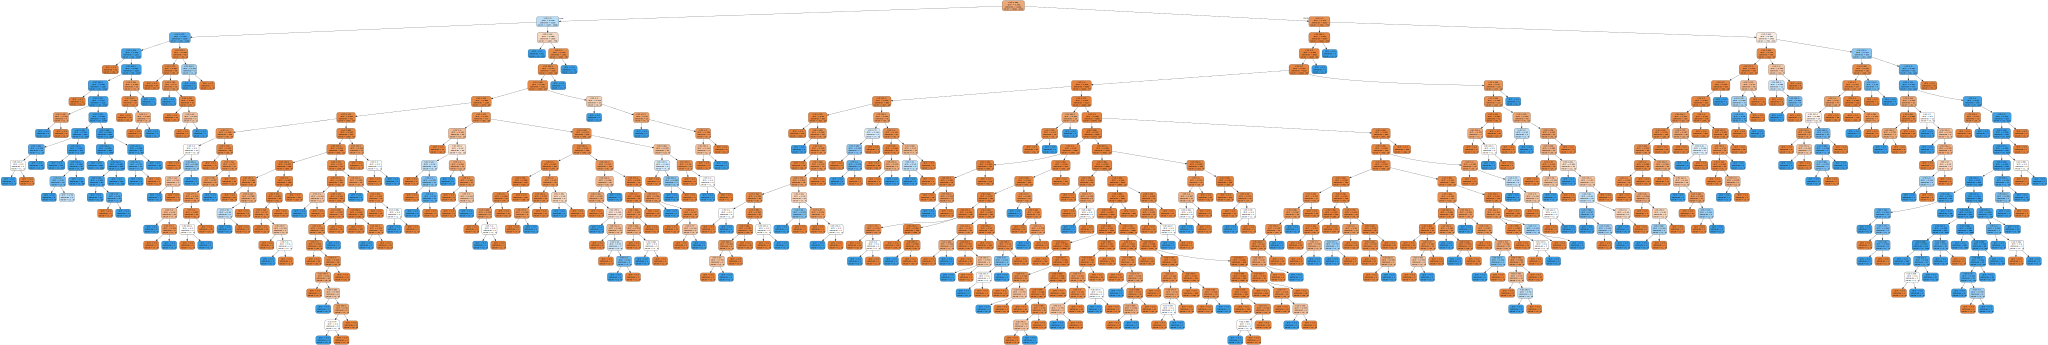

In [71]:
import graphviz 
dot_data = tree.export_graphviz(clf,
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [72]:
num_features = ['satisfaction_level','number_project','average_montly_hours','time_spend_company',
                        'last_evaluation']

In [73]:
X_catnum = train_df.drop(['left'], axis=1)

In [74]:
probs = np.random.rand(len(train_df))
training_mask = probs <= 0.8
validation_mask = probs > 0.8
train_catnum =  train_df[training_mask]
val_catnum = train_df[validation_mask]
X_train_catnum, Y_train_catnum = train_catnum.drop('left', axis = 1), train_catnum['left']
X_val_catnum, Y_val_catnum = val_catnum.drop('left', axis=1), val_catnum['left']

In [75]:
val_catnum.describe()

satisfaction_level  last_evaluation  number_project  \
count         2203.000000      2203.000000     2203.000000   
mean             0.605384         0.722129        3.859283   
std              0.247061         0.171702        1.275490   
min              0.090000         0.360000        2.000000   
25%              0.430000         0.560000        3.000000   
50%              0.640000         0.730000        4.000000   
75%              0.800000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident         left  \
count           2203.000000         2203.000000    2203.000000  2203.000000   
mean             201.998184            3.502497       0.146164     0.243759   
std               50.320535            1.465736       0.353351     0.429446   
min               96.000000            2.000000       0.000000     0.000000   
25%              156.000000            3.000000       0.000000     0.000000   
50%              202.000000            3.000000       0.000000     0.000000   
75%              245.000000            4.000000       0.000000     0.000000   
max              310.000000           10.000000       1.000000     1.000000   

       promotion_last_5years        sales       salary  
count            2203.000000  2203.000000  2203.000000  
mean                0.017703     3.421698     0.605992  
std                 0.131900     3.134529     0.646376  
min                 0.000000     0.000000     0.000000  
25%                 0.000000     0.000000     0.000000  
50%                 0.000000     2.000000     1.000000  
75%                 0.000000     6.000000     1.000000  
max                 1.000000     9.000000     2.000000

In [76]:
nodecount = 0

In [77]:
class DecisionTreeBranchCatNum(object):
    def __init__(self, feature_name, subtrees, default_value, split_pos):
        self.feature_name = feature_name
        self.subtrees = subtrees
        self.default_value = default_value
        self.split_pos = split_pos
        
    def predict(self, x):
        if any(self.feature_name in n_f for n_f in num_features):
            subtree = None
            if x[self.feature_name]<self.split_pos:
                subtree = self.subtrees.get(0)
            else:
                subtree = self.subtrees.get(1)
        else:
            subtree = self.subtrees.get(x[self.feature_name])
        #print(x[self.feature_name])
        if subtree:
            return subtree.predict(x)
        else:
            return self.default_value
    def print_tree(self, indent):
        spaces = ' '*indent
        print('{0}{1}:'.format(spaces, self.feature_name))
        print('{0} <default> ==> {1}'.format(spaces, self.default_value))
        for v in sorted(self.subtrees):
            print('{0} {1} ->'.format(spaces,v))
            self.subtrees[v].print_tree(indent+4)

In [78]:
from scipy.stats.mstats import mquantiles
def train_decision_tree_num(XY, available_feature, max_depth):
    distribution = Counter(y for _,y in XY)
    majority_value = distribution.most_common(1)[0][0]
    global nodecount
    #print(distribution)
    if max_depth == 0:
        nodecount+=1
        return DecisionTreeLeaf(majority_value)
    if len(distribution) == 1:
        nodecount+=1
        return DecisionTreeLeaf(majority_value)
    if not available_feature:
        nodecount+=1
        return DecisionTreeLeaf(majority_value)
    selected_feature = min(available_feature, key=lambda f:majority_sum_scorer(f,XY))
    split_pos = 0
    next_available_feature = None
    if any(selected_feature in n_f for n_f in num_features):
        _,split_pos = majority_sum_scorer_num(selected_feature,XY)
        XY_split = split_by_feature_num(selected_feature, XY,split_pos)
        next_available_feature = available_feature
        nodecount+=2
        #print(split_pos)
    else:
        next_available_feature = set(available_feature)  - set([selected_feature])
        #print(next_available_feature)
        XY_split = split_by_feature_cat(selected_feature, XY)
        nodecount+=len(XY_split.items())
    #print(selected_feature)
    #print(split_pos)
    subtrees = {}
    for value, XY_subset in XY_split.items():
        subtrees[value] = train_decision_tree_num(XY_subset, next_available_feature, max_depth-1)
    return DecisionTreeBranchCatNum(selected_feature, subtrees, majority_value, split_pos)

def split_by_feature_num(feature_name, XY,split_pos):
    XY_split = defaultdict(list)
    for x, y in XY:
        #print(x)
        if x.get(feature_name) < split_pos:
            XY_split[0].append((x,y))
        else:
            XY_split[1].append((x,y))
    return XY_split
def split_by_feature_cat(feature_name, XY):
    XY_split = defaultdict(list)
    for x, y in XY:
        #print(x)
        XY_split[x.get(feature_name)].append((x,y))
    return XY_split

def majority_sum_scorer_cat(feature_name, XY):
    lst = list(set([x.get(feature_name) for x,y in XY]))
    #print(lst)
    q = [0]*len(lst)
    qpos = [0]*len(lst)
    for x,y in XY:
        for i in range(len(lst)):
            if x.get(feature_name) == lst[i]:
                q[i]+=1
                if y == 1:
                    qpos[i]+=1
    majority_sum = 0.0
    for i in range(len(q)):
        #majority_sum += 2*qpos[i]*(q[i]-qpos[i])
        #print('{0} {1}'.format(q[i],qpos[i]))
        if (q[i]>0 and qpos[i]>0) and qpos[i]<q[i]:
            x = -((qpos[i]/q[i])*np.log(qpos[i]/q[i]) + ((q[i]-qpos[i])/q[i])*np.log((q[i]-qpos[i])/q[i]))
            majority_sum += (q[i]/len(XY)) *x 
    #print('{0} {1}'.format(majority_sum, feature_name))
    return majority_sum, 0

def majority_sum_scorer_num(feature_name, XY):
    lst = sorted(list(set([x.get(feature_name) for x,y in XY])))
    lst.extend(mquantiles(lst).tolist())
    #print(feature_name)
    #print(lst)
    split_pos = lst[0]
    mx = 1e19
    for k in range(len(lst)):
        q = [0]*2
        qpos = [0]*2
        for x,y in XY:
            if x.get(feature_name) < lst[k]:
                q[0]+=1
                if y == 1:
                    qpos[0]+=1
            else:
                q[1]+=1
                if y==1:
                    qpos[1] += 1
                        
        majority_sum = 0.0
        for i in range(len(q)):
            #majority_sum += 2*qpos[i]*(q[i]-qpos[i])
            #print('{0} {1}'.format(q[i],qpos[i]))
            if (q[i]>0 and qpos[i]>0) and qpos[i]<q[i]:
                y = -((qpos[i]/q[i])*np.log(qpos[i]/q[i]) + ((q[i]-qpos[i])/q[i])*np.log((q[i]-qpos[i])/q[i]))
                majority_sum += (q[i]/len(XY)) *y 
        if mx>=majority_sum:
            mx = majority_sum
            split_pos = lst[k]
    #print('{0} {1} {2}'.format(feature_name, majority_sum, lst[k]))
    return (mx,split_pos)
def majority_sum_scorer(feature_name, XY):
    #print(feature_name)
    if any(feature_name in n_f for n_f in num_features):
        #print("hi")
        #print(feature_name)
        return majority_sum_scorer_num(feature_name, XY)
    else:
        #print("hi")
        #print(feature_name)
        return majority_sum_scorer_cat(feature_name, XY)

In [79]:
class DecisionTreeCatNum(object):
    def __init__(self):
        pass
    def fit(self, X, Y, max_depth=997):
        #XY = list(zip(train_df['sales'],train_df['salary'],train_df['promotion_last_5years'],train_df['Work_accident'],Y))
        XY = list(zip(X, Y))
        #print(XY)
        #print(Y)
        available_features = set(f for x in X for f in x)
        #print(available_features)
        self.root = train_decision_tree_num(XY, available_features, max_depth)
    def predict(self, X):
        return [self.predict_one(x) for x in X]
    
    def predict_one(self, x):
        return self.root.predict(x)
    def print_tree(self):
        return self.root.print_tree(0)

In [80]:
X_train1_catnum = X_train_catnum.to_dict('records')
X_val1_catnum = X_val_catnum.to_dict('records')

In [81]:
classifier = DecisionTreeCatNum()
classifier.fit(X_train1_catnum, Y_train_catnum, max_depth=10)

In [82]:
classifier.print_tree()

satisfaction_level:
 <default> ==> 0
 0 ->
    number_project:
     <default> ==> 1
     0 ->
        last_evaluation:
         <default> ==> 1
         0 ->
            last_evaluation:
             <default> ==> 1
             0 ->
                 ==> 0
             1 ->
                average_montly_hours:
                 <default> ==> 1
                 0 ->
                    average_montly_hours:
                     <default> ==> 1
                     0 ->
                         ==> 0
                     1 ->
                        salary:
                         <default> ==> 1
                         0.0 ->
                            satisfaction_level:
                             <default> ==> 1
                             0 ->
                                Work_accident:
                                 <default> ==> 1
                                 0.0 ->
                                     ==> 0
                                 1.0 ->
                   

In [83]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_catnum, Y_train_catnum)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
from sklearn.metrics import accuracy_score
guesses = classifier.predict(X_val1_catnum)

#print(guesses)
g = clf.predict(X_val_catnum)
print('Scikit: {0} My_classifier: {1}'.format(accuracy_score(Y_val_catnum,g),accuracy_score(Y_val_catnum, guesses)))

Scikit: 0.9754879709487063 My_classifier: 0.9718565592374036


In [85]:
print(nodecount)

692
